Румынина Екатерина Александровна М8О-401Б-21

# Выбор начальных условий
a.	Набор данных для задачи классификации - **Bike Buyers 1000** (https://www.kaggle.com/datasets/heeraldedhia/bike-buyers/data)

**Описание**: датасет содержит информацию о 1000 пользователях из различных социальных групп и указывает, купили ли они велосипед или нет. Сведения включают в себя: семейное положение, пол, уровень дохода, количество детей, уровень образования, профессия, владение жильем, количество автомобилей, расстояние до работы, регион проживания, возраст, факт покупки велосипеда.

**Реальная практическая задача**: предсказание, купит ли человек велосипед на основе его социально-демографических данных. Это может быть полезно для таргетированной рекламы. Компании могут направлять рекламные кампании на наиболее вероятных покупателей, что позволит сократить расходы и увеличить эффективность.

b.	Набор данных для задачи регрессии - **Used Bikes Prices in India** (https://www.kaggle.com/datasets/saisaathvik/used-bikes-prices-in-india/data)

**Описание**: датасет включает данные о различных подержанных мотоциклах. В него входят такие характеристики, как мощность, пробег в километрах, возраст мотоцикла, город продажи, количество владельцев, бренд.

**Реальная практическая задача**: предсказание цены подержанных мотоциклов. Решение этой задачи может помочь автоматизировать процесс оценки стоимости подержанных мотоциклов, что важно для онлайн-платформ по продаже транспортных средств, а также частных продавцов и покупателей, которым сложно самостоятельно оценить реальную цену мотоцикла.

c.	Метрики качества

Метрики качества для задачи классификации - в качестве основной метрики буду использовать **accuracy**, так как она проста и понятна, даёт общее представление о точности. В качестве дополнительной метрики буду использовать **precision**, так как важно уменьшить затраты на неверный таргетинг.  

Метрики качества для задачи регрессии - в качестве основной метрики буду использовать **rmse**, так как она чуствительна к большим отклонениям, что важно при предсказании цены. В качестве дополнительной метрики буду использовать **R^2** для понимания общей эффективности модели.


# Лабораторная работа №1 (Проведение исследований с алгоритмом KNN)

Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, root_mean_squared_error, mean_absolute_error, accuracy_score, balanced_accuracy_score, f1_score, recall_score, precision_score


Функции для вывода метрик:

In [2]:
def class_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision =  precision_score(y_test, y_pred, pos_label='Yes')
    print(f"accuracy: {accuracy}")
    print(f"precision: {precision}")

def class_metrics_diff(y_test, y_pred):
    accuracy_opt = accuracy_score(y_test, y_pred)
    precision_opt =  precision_score(y_test, y_pred, pos_label='Yes')
    print(f"accuracy: {accuracy_opt}")
    print(f"precision: {precision_opt}")
    print("Разница с бейзлайном:")
    print(f"accuracy: {accuracy_opt-accuracy}")
    print(f"precision: {precision_opt-precision}")

def reg_metrics(y_test, y_pred):
    rmse =  root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"RMSE: {rmse}")
    print(f"R^2: {r2}")

def reg_metrics_diff(y_test, y_pred):
    r2_opt = r2_score(y_test, y_pred)
    rmse_opt =  root_mean_squared_error(y_test, y_pred)
    print(f"RMSE: {rmse_opt}")
    print(f"R^2: {r2_opt}")
    print("Разница с бейзлайном:")
    print(f"RMSE: {rmse_opt-rmse}")
    print(f"R^2: {r2_opt-r2}")

## Задача классификации

Загружаем датасет

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
dataset_path = '/content/drive/My Drive/Colab Notebooks/bike_buyers.csv'
data = pd.read_csv(dataset_path)

data.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


### Создание бейзлайна и оценка качества

Проверим датасет на пустые значения

In [ ]:
print(data.isna().sum())

ID                   0
Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
dtype: int64


Проверим датасет на дублирующиеся строки

In [ ]:
print(data.duplicated().sum())

0


Очистим датасет от na

In [12]:
data = data.dropna()

Выведем статистику числовых столбцов

In [ ]:
data.describe().round(2)

,ID,Income,Children,Cars,Age
count,952.00,952.00,952.00,952.00,952.00
mean,19979.94,55903.36,1.90,1.45,44.26
std,5334.00,30845.48,1.62,1.11,11.43
min,11000.00,10000.00,0.00,0.00,25.00
25%,15310.25,30000.00,0.00,1.00,35.00
50%,19747.50,60000.00,2.00,1.00,43.00
75%,24531.50,70000.00,3.00,2.00,52.00
max,29447.00,170000.00,5.00,4.00,89.00


Выведем статистику текстовых столбцов

In [ ]:
data.describe(include=['object'])

,Marital Status,Gender,Education,Occupation,Home Owner,Commute Distance,Region,Purchased Bike
count,952,952,952,952,952,952,952,952
unique,2,2,5,5,2,5,3,2
top,Married,Male,Bachelors,Professional,Yes,0-1 Miles,North America,No
freq,518,479,292,263,652,339,486,496


Кодируем все катергориальные признаки с помощью Label encoder

In [13]:
data_original = data.copy();

In [14]:
label = LabelEncoder()
data['Marital Status'] = label.fit_transform(data['Marital Status'])
data['Gender'] = label.fit_transform(data['Gender'])
data['Education'] = label.fit_transform(data['Education'])
data['Occupation'] = label.fit_transform(data['Occupation'])
data['Home Owner'] = label.fit_transform(data['Home Owner'])
data['Gender'] = label.fit_transform(data['Gender'])
data['Commute Distance'] = label.fit_transform(data['Commute Distance'])
data['Region'] = label.fit_transform(data['Region'])
data['Purchased Bike'] = label.fit_transform(data['Purchased Bike'])

Тренируем модель

In [15]:
X = data.drop(columns=["Purchased Bike"])
y = data["Purchased Bike"]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

Оценка качества

In [17]:
    accuracy = accuracy_score(y_test, y_pred)
    precision =  precision_score(y_test, y_pred)
    print(f"accuracy: {accuracy}")
    print(f"precision: {precision}")


accuracy: 0.42408376963350786
precision: 0.43617021276595747


### Улучшение бейзлайна

Визиализируем данные

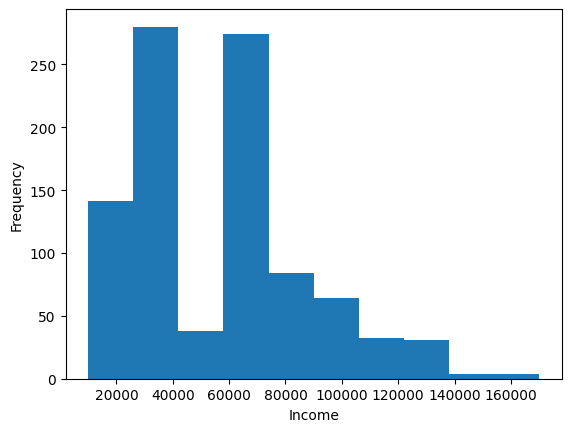

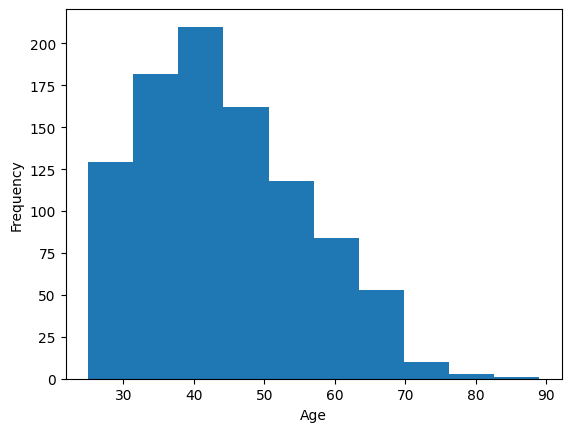

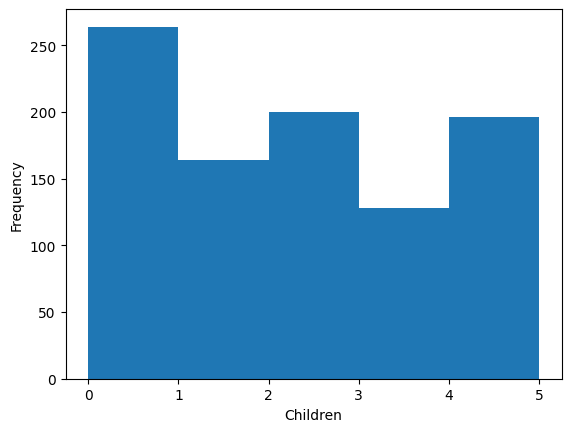

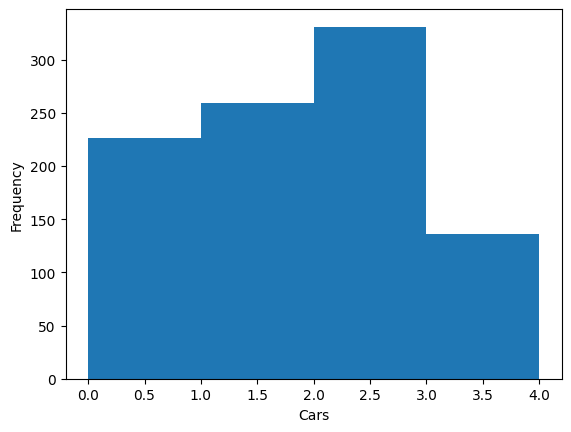

In [ ]:
data_original['Income'].plot(kind='hist')
plt.xlabel('Income')
plt.show()
data_original['Age'].plot(kind='hist')
plt.xlabel('Age')
plt.show()
data_original['Children'].plot(kind='hist', bins = 5)
plt.xlabel('Children')
plt.show()
data_original['Cars'].plot(kind='hist', bins = 4)
plt.xlabel('Cars')
plt.show()


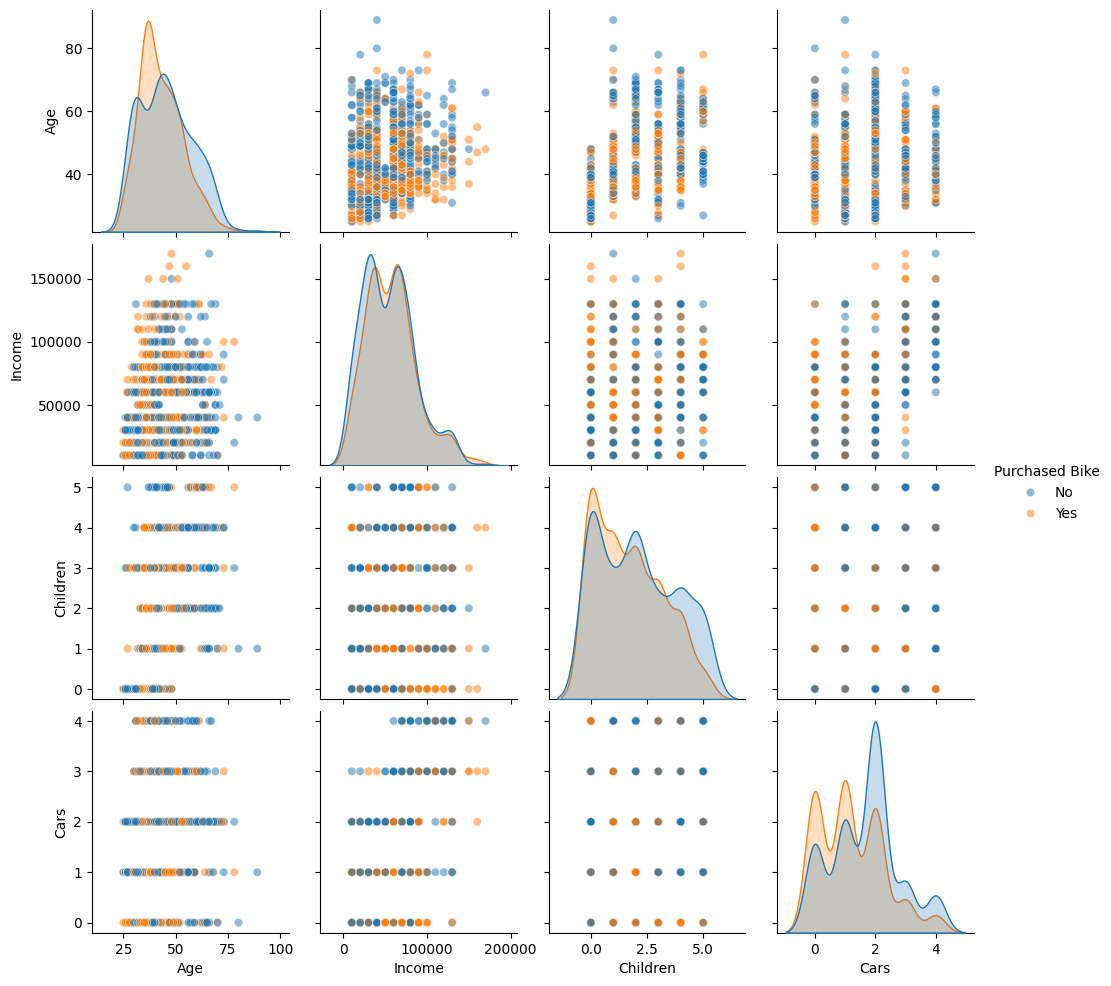

In [ ]:
sns.pairplot(data_original, vars=['Age', 'Income', 'Children', 'Cars'], hue='Purchased Bike', plot_kws={'alpha': 0.5})
plt.show()

Построим матрицу корреляций

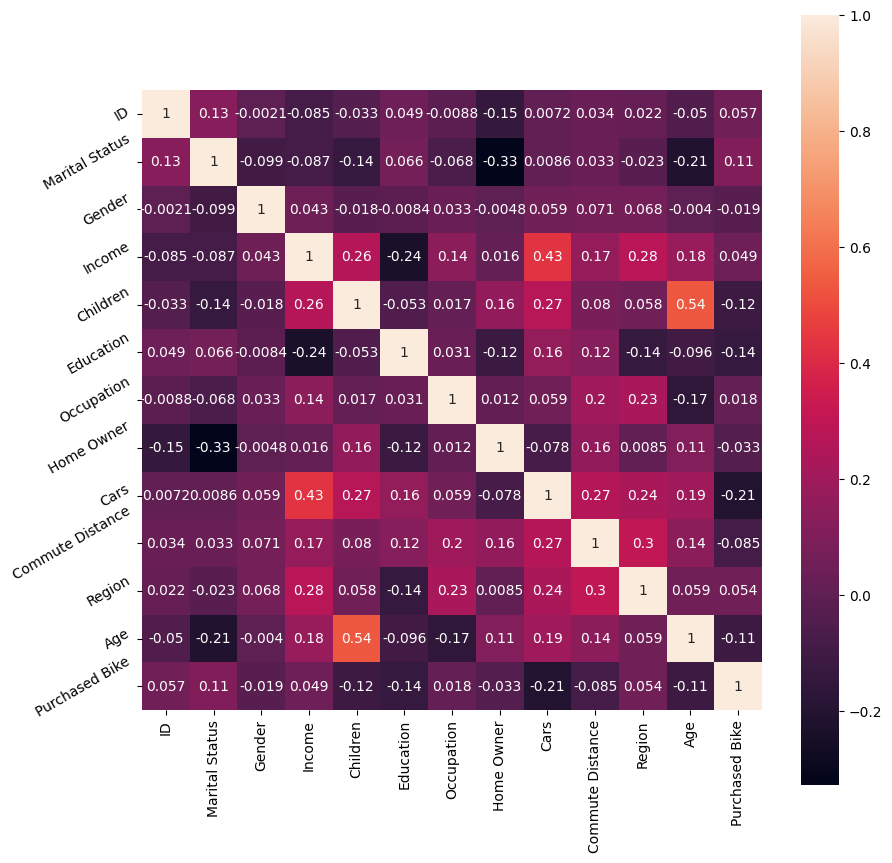

In [18]:
correlation = data.corr()
plt.figure(figsize=(10,10))
a = sns.heatmap(correlation, square=True, annot=True)
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

Частота каждого региона, уровня образования и тд.

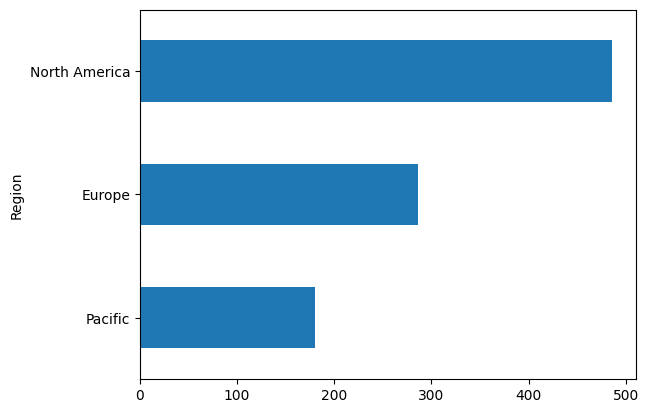

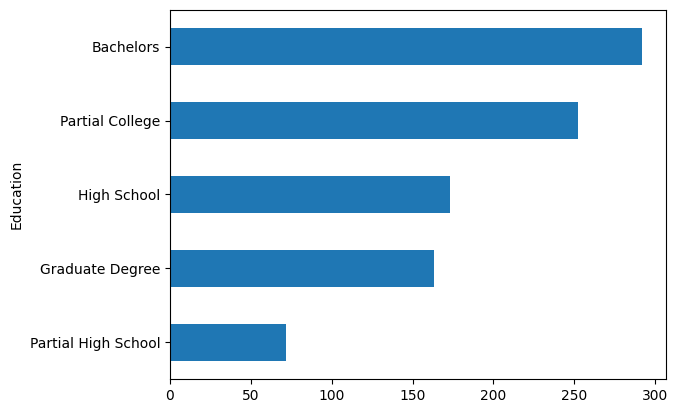

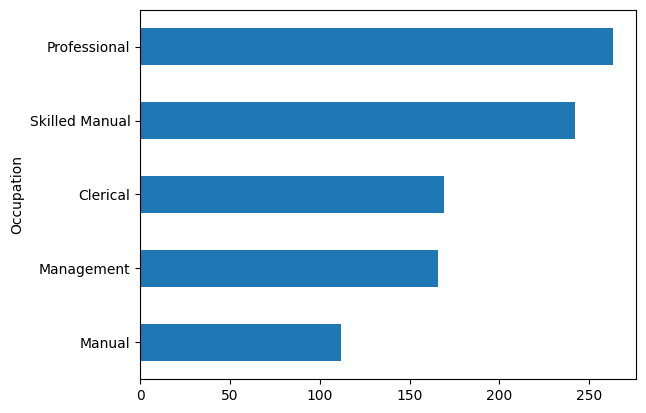

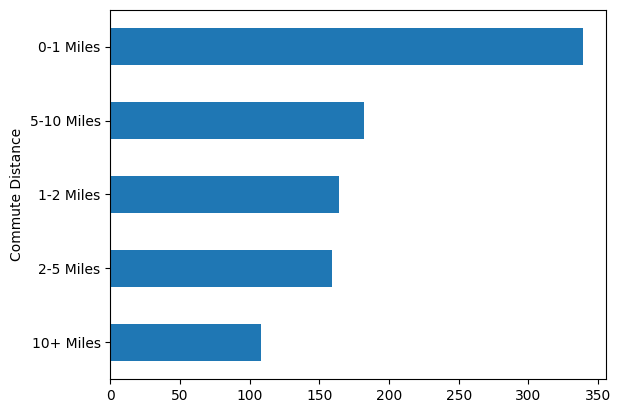

In [19]:
data_original['Region'].value_counts().plot(kind="barh")
plt.gca().invert_yaxis()
plt.show()

data_original['Education'].value_counts().plot(kind="barh")
plt.gca().invert_yaxis()
plt.show()

data_original['Occupation'].value_counts().plot(kind="barh")
plt.gca().invert_yaxis()
plt.show()

data_original['Commute Distance'].value_counts().plot(kind="barh")
plt.gca().invert_yaxis()
plt.show()

На основе визуализации данных и их анализа сформулируем гипотезы, которые могут улучшить модель:

a. Удаление ID

b. One-hot encoding для Marital Status, Gender, Home Owner, Region

c. Масштабирование признаков

d. Новый признак (Income Per Family Member)

e. Разбить Age и Income по категориям

f. Подбор гиперпараметров на кросс-валидации


Проверка гипотез:

a. Удаление ID

In [ ]:
data_opt = data_original.copy()

label = LabelEncoder()
data_opt['Marital Status'] = label.fit_transform(data_opt['Marital Status'])
data_opt['Gender'] = label.fit_transform(data_opt['Gender'])
data_opt['Education'] = label.fit_transform(data_opt['Education'])
data_opt['Occupation'] = label.fit_transform(data_opt['Occupation'])
data_opt['Home Owner'] = label.fit_transform(data_opt['Home Owner'])
data_opt['Commute Distance'] = label.fit_transform(data_opt['Commute Distance'])
data_opt['Region'] = label.fit_transform(data_opt['Region'])
X = data_opt.drop(columns=["Purchased Bike","ID"])
y = data_opt["Purchased Bike"]
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [ ]:
class_metrics_diff(y_test,y_pred)

accuracy: 0.6596858638743456
precision: 0.6813186813186813
Разница с бейзлайном:
accuracy: 0.23560209424083772
precision: 0.24514846855272387


b. One-hot encoding для Marital Status, Gender, Home Owner, Region

In [ ]:
data_opt = data_original.copy()
label = LabelEncoder()
data_opt['Education'] = label.fit_transform(data_opt['Education'])
data_opt['Occupation'] = label.fit_transform(data_opt['Occupation'])
data_opt['Commute Distance'] = label.fit_transform(data_opt['Commute Distance'])
data_opt = pd.get_dummies(data_opt, columns=["Marital Status","Gender","Home Owner","Region"])

In [ ]:
X = data_opt.drop(columns=["Purchased Bike"])
y = data_opt["Purchased Bike"]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [ ]:
class_metrics_diff(y_test,y_pred)

accuracy: 0.42408376963350786
precision: 0.43617021276595747
Разница с бейзлайном:
accuracy: 0.0
precision: 0.0


c. Масштабирование признаков

In [ ]:
data_opt = data.copy()
X = data_opt.drop(columns=["Purchased Bike"])
y = data_opt["Purchased Bike"]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [ ]:
class_metrics_diff(y_test,y_pred)

accuracy: 0.6596858638743456
precision: 0.6987951807228916
Разница с бейзлайном:
accuracy: 0.23560209424083772
precision: 0.26262496795693413


d. Новый признак (Income Per Family Member)

In [ ]:
data_opt = data_original.copy()
label = LabelEncoder()
data_opt['Marital Status'] = label.fit_transform(data_opt['Marital Status'])
data_opt['Gender'] = label.fit_transform(data_opt['Gender'])
data_opt['Education'] = label.fit_transform(data_opt['Education'])
data_opt['Occupation'] = label.fit_transform(data_opt['Occupation'])
data_opt['Home Owner'] = label.fit_transform(data_opt['Home Owner'])
data_opt['Commute Distance'] = label.fit_transform(data_opt['Commute Distance'])
data_opt['Region'] = label.fit_transform(data_opt['Region'])
data_opt['Income Per Family Member'] = np.where(data_opt['Children'] > 0, data_opt['Income'] / (data_opt['Children']+2), data_opt['Income'])

In [ ]:
X = data_opt.drop(columns=["Purchased Bike"])
y = data_opt["Purchased Bike"]
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [ ]:
class_metrics_diff(y_test,y_pred)

accuracy: 0.5654450261780105
precision: 0.5773195876288659
Разница с бейзлайном:
accuracy: 0.14136125654450266
precision: 0.14114937486290846


e. Разбить Age и Income по категориям

In [ ]:
data_opt = data_original.copy()
label = LabelEncoder()
data_opt['Marital Status'] = label.fit_transform(data_opt['Marital Status'])
data_opt['Gender'] = label.fit_transform(data_opt['Gender'])
data_opt['Education'] = label.fit_transform(data_opt['Education'])
data_opt['Occupation'] = label.fit_transform(data_opt['Occupation'])
data_opt['Home Owner'] = label.fit_transform(data_opt['Home Owner'])
data_opt['Commute Distance'] = label.fit_transform(data_opt['Commute Distance'])
data_opt['Region'] = label.fit_transform(data_opt['Region'])
data_opt['Income'] = pd.cut(x = data_opt['Income'], bins = [0, 50000, 100000, 200000], labels = [0, 1, 2])
data_opt['Income'] = data_opt['Income'].astype('int64')
data_opt['Age'] = pd.cut(x = data_opt['Age'], bins = [0,35,60,100], labels = [0, 1, 2])
data_opt['Age'] = data_opt['Age'].astype('int64')


In [ ]:
X = data_opt.drop(columns=["Purchased Bike"])
y = data_opt["Purchased Bike"]
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [ ]:
class_metrics_diff(y_test,y_pred)

accuracy: 0.5130890052356021
precision: 0.5274725274725275
Разница с бейзлайном:
accuracy: 0.08900523560209422
precision: 0.09130231470657002


f. Подбор гиперпараметров на кросс-валидации

In [ ]:
X = data.drop(columns=["Purchased Bike"])
y = data["Purchased Bike"]
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)
param_grid = {
    'n_neighbors': range(1, 15),
    'weights': ['uniform', 'distance'],
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Лучшие параметры: ", grid_search.best_params_)

Лучшие параметры:  {'n_neighbors': 7, 'weights': 'distance'}


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 7, weights ='distance')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [ ]:
class_metrics_diff(y_test,y_pred)

accuracy: 0.5078534031413613
precision: 0.5232558139534884
Разница с бейзлайном:
accuracy: 0.08376963350785344
precision: 0.08708560118753095


Результат проверки гипотез: большинство гипотез улучшили показатели, One-hot encoding не внес изменений

Улучшение бейзлайна

In [ ]:
data_opt = data_original.copy()

label = LabelEncoder()
data_opt['Marital Status'] = label.fit_transform(data_opt['Marital Status'])
data_opt['Gender'] = label.fit_transform(data_opt['Gender'])
data_opt['Education'] = label.fit_transform(data_opt['Education'])
data_opt['Occupation'] = label.fit_transform(data_opt['Occupation'])
data_opt['Home Owner'] = label.fit_transform(data_opt['Home Owner'])
data_opt['Commute Distance'] = label.fit_transform(data_opt['Commute Distance'])
data_opt['Region'] = label.fit_transform(data_opt['Region'])


data_opt['Income Per Family Member'] = np.where(data_opt['Children'] > 0, data_opt['Income'] / (data_opt['Children'] + 2), data_opt['Income'])

data_opt['Income'] = pd.cut(x = data_opt['Income'], bins = [0, 50000, 100000, 200000], labels = [0, 1, 2])
data_opt['Income'] = data_opt['Income'].astype('int64')

data_opt['Age'] = pd.cut(x = data_opt['Age'], bins = [0,35,60,100], labels = [0, 1, 2])
data_opt['Age'] = data_opt['Age'].astype('int64')

data_opt = data_opt.drop(columns=["ID"])

X = data_opt.drop(columns=["Purchased Bike"])
y = data_opt["Purchased Bike"]
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

In [ ]:
param_grid = {
    'n_neighbors': range(1, 15),
    'weights': ['uniform', 'distance'],
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Лучшие параметры: ", grid_search.best_params_)

Лучшие параметры:  {'n_neighbors': 3, 'weights': 'distance'}


Тренировка модели

In [ ]:
knn = KNeighborsClassifier(n_neighbors= 3, weights= 'distance')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

Оценка качества

In [ ]:
class_metrics_diff(y_test,y_pred)

accuracy: 0.7015706806282722
precision: 0.735632183908046
Разница с бейзлайном:
accuracy: 0.27748691099476436
precision: 0.2994619711420885


Вывод: благодаря выдвинутым гипотезам удалось значительно улучшить качество модели.

### Имплементация алгоритма машинного обучения

In [ ]:
class KNNClassifier_custom:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train)
        unique_labels = list(set(y_train))
        self.label_map = {label: idx for idx, label in enumerate(unique_labels)}
        self.inverse_label_map = {idx: label for label, idx in self.label_map.items()}
        self.y_train = np.array([self.label_map[label] for label in y_train])

    def predict(self, X_test):
        X_test = np.array(X_test)
        int_predictions = np.array([self._predict(x) for x in X_test])
        return np.array([self.inverse_label_map[pred] for pred in int_predictions])

    def _predict(self, x):
        dists = [np.linalg.norm(x - x_train) for x_train in self.X_train]
        k_inds = np.argsort(dists)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_inds]
        return np.bincount(k_nearest_labels).argmax()

Тренировка модели

Сравнение с бейзлайном

In [ ]:
X = data.drop(columns=["Purchased Bike"])
y = data["Purchased Bike"]
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

knn = KNNClassifier_custom()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

Оценка качества

In [ ]:
class_metrics_diff(y_test,y_pred)

accuracy: 0.42408376963350786
precision: 0.43617021276595747
Разница с бейзлайном:
accuracy: 0.0
precision: 0.0


Сравнение с улучшенным бейзлайном

In [ ]:
X = data_opt.drop(columns=["Purchased Bike"])
y = data_opt["Purchased Bike"]
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

Оценка качества

In [ ]:
class_metrics_diff(y_test,y_pred)

accuracy: 0.6963350785340314
precision: 0.7325581395348837
Разница с бейзлайном:
accuracy: 0.27225130890052357
precision: 0.2963879267689262


Метрики на улучшенном бейзлайне (sklearn):
accuracy: 0.7015706806282722
precision: 0.735632183908046

Вывод: собственная имплементированная модель показала себя идентично на бейзлайне и чуть-чуть похуже на улучшеном бейзлайне

## Задача регрессии

Згружаем датасет

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_path = '/content/drive/My Drive/Colab Notebooks/Used_Bikes.csv'
data = pd.read_csv(dataset_path)
data.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


### Создание бейзлайна и оценка качества

Проверим датасет на пустые значения

In [ ]:
print(data.isna().sum())

bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64


Проверим датасет на дублирующиеся строки

In [ ]:
print(data.duplicated().sum())

25324


Очистим датасет от дубликатов

In [ ]:
data = data.drop_duplicates()

Выведем статистику числовых столбцов

In [ ]:
data.describe().round(2)

,price,kms_driven,age,power
count,7324.00,7324.00,7324.00,7324.00
mean,84883.90,23910.50,6.66,228.13
std,120966.19,27317.59,3.61,158.32
min,4400.00,1.00,1.00,100.00
25%,30000.00,10155.75,4.00,125.00
50%,55000.00,19000.00,6.00,160.00
75%,100000.00,30112.00,8.00,350.00
max,1900000.00,750000.00,63.00,1800.00


Выведем статистику текстовых столбцов

In [ ]:
data.describe(include=['object'])

,bike_name,city,owner,brand
count,7324,7324,7324,7324
unique,471,443,4,23
top,Royal Enfield Classic 350cc,Delhi,First Owner,Bajaj
freq,358,1426,6642,2081


Кодируем все катергориальные признаки с помощью Label encoder

In [ ]:
data_original = data.copy()
label = LabelEncoder()
data['owner'] = label.fit_transform(data['owner'])
data['brand'] = label.fit_transform(data['brand'])
data['city'] = label.fit_transform(data['city'])
data['bike_name'] = label.fit_transform(data['bike_name'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7324 entries, 0 to 9372
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   7324 non-null   int64  
 1   price       7324 non-null   float64
 2   city        7324 non-null   int64  
 3   kms_driven  7324 non-null   float64
 4   owner       7324 non-null   int64  
 5   age         7324 non-null   float64
 6   power       7324 non-null   float64
 7   brand       7324 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 515.0 KB


Тренируем модель

In [ ]:
X = data.drop(columns=["price"])
y = data["price"]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

Оценка качества

In [ ]:
rmse =  root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

RMSE: 82162.94197785211
R^2: 0.6532514681767299


### Улучшение бейзлайна

Визиализируем данные

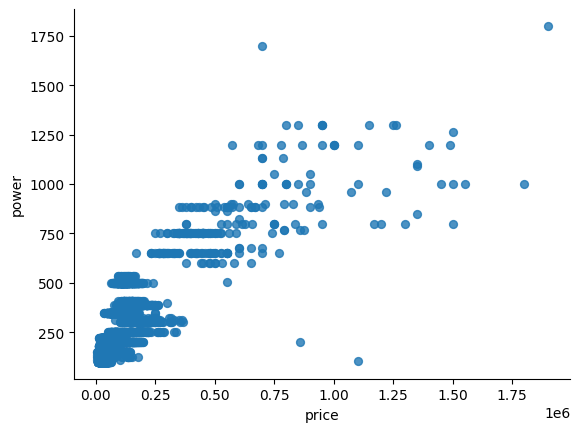

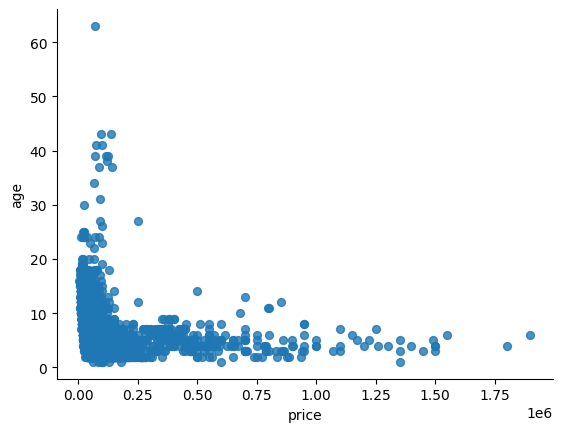

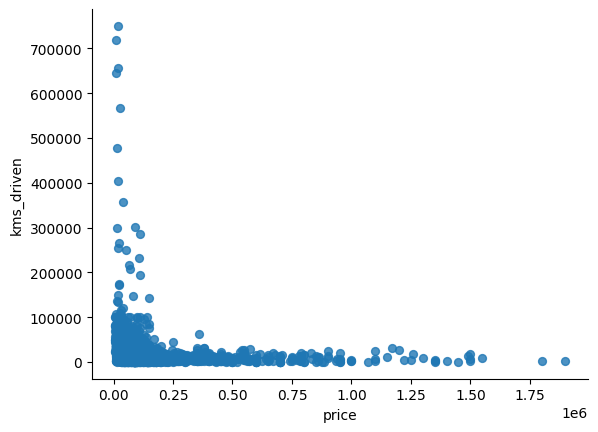

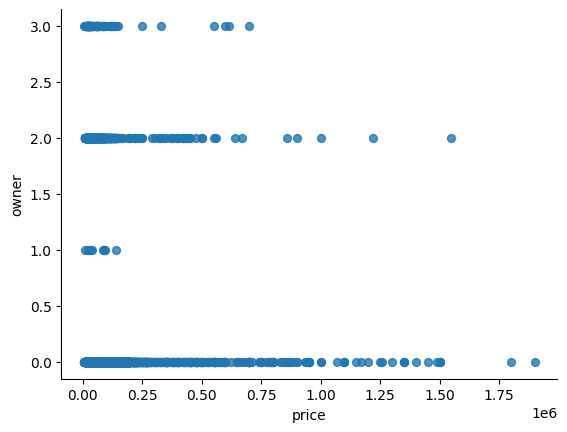

In [ ]:
data.plot(kind='scatter', x='price', y='power', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
data.plot(kind='scatter', x='price', y='age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
data.plot(kind='scatter', x='price', y='kms_driven', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
data.plot(kind='scatter', x='price', y='owner', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)


Построим матрицу корреляций

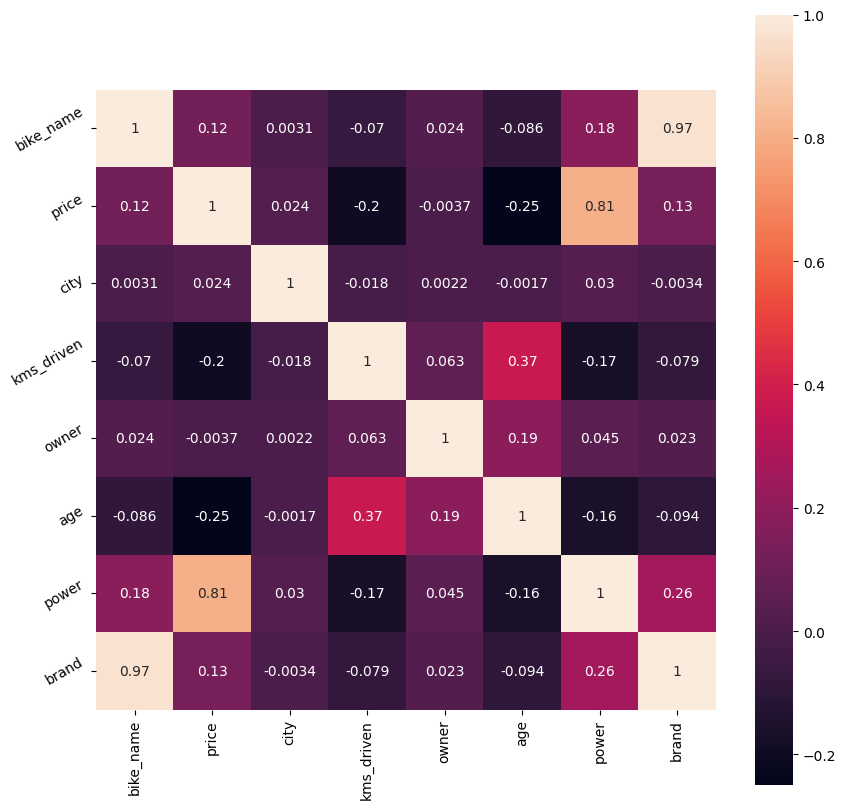

In [ ]:
correlation = data.corr()
plt.figure(figsize=(10,10))
a = sns.heatmap(correlation, square=True, annot=True)
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

Частота каждого бренда, города и названия

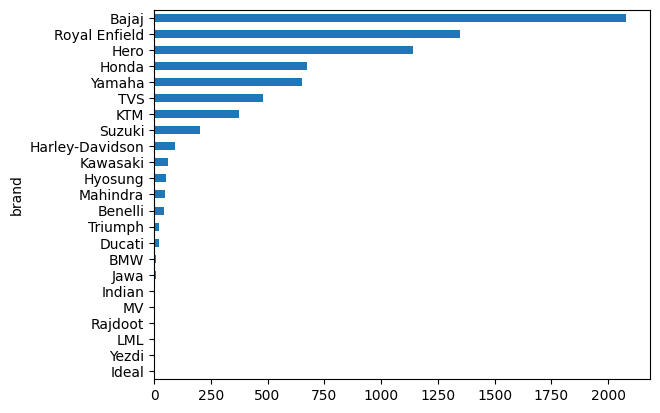

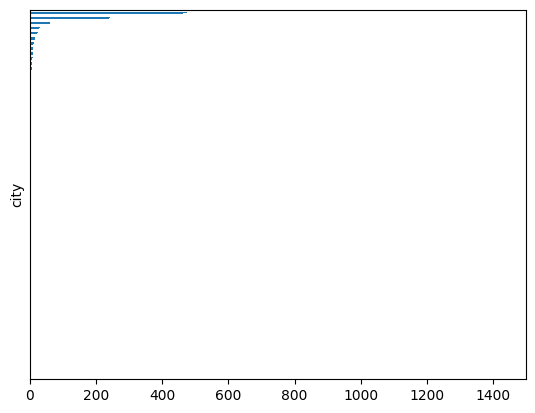

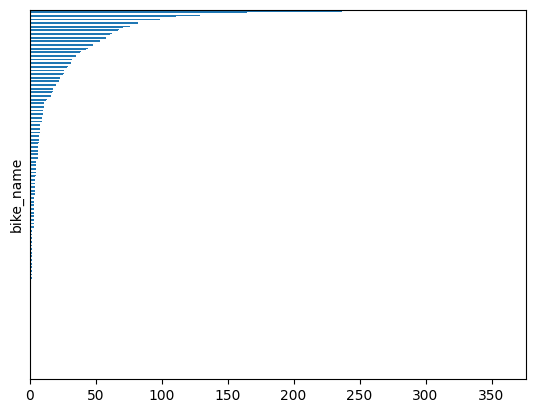

In [ ]:
data_original['brand'].value_counts().plot(kind="barh")
plt.gca().invert_yaxis()
plt.show()

data_original['city'].value_counts().plot(kind="barh")
plt.gca().invert_yaxis()
plt.gca().set_yticks([])
plt.gca().set_yticklabels([])
plt.show()

data_original['bike_name'].value_counts().plot(kind="barh")
plt.gca().invert_yaxis()
plt.gca().set_yticks([])
plt.gca().set_yticklabels([])
plt.show()

На основе визуализации данных и их анализа сформулируем гипотезы, которые могут улучшить модель:

a. Удаление city и bike_name

b. One-hot encoding для brand

c. Масштабирование признаков

d. Подбор гиперпараметров на кросс-валидации


Проверка гипотез:

a. Удаление city и bike_name

In [ ]:
data_opt = data_original.copy()
data_opt = data_opt.drop(columns=["bike_name","city"])

In [ ]:
data_opt['owner'] = label.fit_transform(data_opt['owner'])
data_opt['brand'] = label.fit_transform(data_opt['brand'])
data_opt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7324 entries, 0 to 9372
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       7324 non-null   float64
 1   kms_driven  7324 non-null   float64
 2   owner       7324 non-null   int64  
 3   age         7324 non-null   float64
 4   power       7324 non-null   float64
 5   brand       7324 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 400.5 KB


Тренируем модель

In [ ]:
X = data_opt.drop(columns=["price"])
y = data_opt["price"]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

Оценка качества

In [ ]:
reg_metrics_diff(y_test, y_pred)

RMSE: 79674.21113200771
R^2: 0.6739394834709149
Разница с бейзлайном:
RMSE: -2488.730845844402
R^2: 0.02068801529418507


b. One-hot encoding для brand

Так как брендов 23, уменьшим их количество, оставив только те, которые встречаются в датасете чаще 350 раз. Остальные отнесем в категорию others.

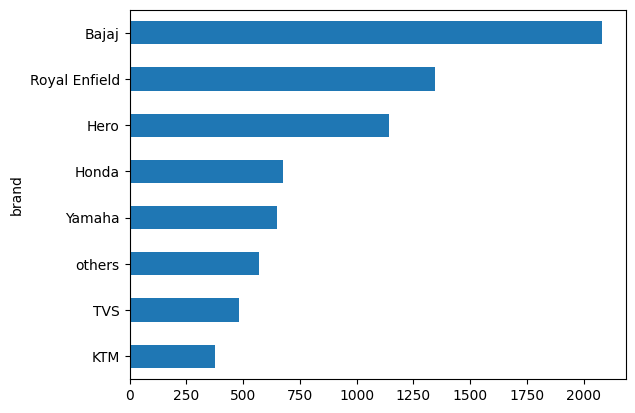

In [ ]:
data_opt = data_original.copy()
brands = data_original['brand'].value_counts()
others = brands[brands<=350].keys()
data_opt['brand'] = data_opt['brand'].replace(others, "others")

data_opt['brand'].value_counts().plot(kind="barh")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
data_opt = pd.get_dummies(data_opt, columns=["brand"])
data_opt['city'] = label.fit_transform(data_opt['city'])
data_opt['owner'] = label.fit_transform(data_opt['owner'])
data_opt['bike_name'] = label.fit_transform(data_opt['bike_name'])
data_opt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7324 entries, 0 to 9372
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bike_name            7324 non-null   int64  
 1   price                7324 non-null   float64
 2   city                 7324 non-null   int64  
 3   kms_driven           7324 non-null   float64
 4   owner                7324 non-null   int64  
 5   age                  7324 non-null   float64
 6   power                7324 non-null   float64
 7   brand_Bajaj          7324 non-null   bool   
 8   brand_Hero           7324 non-null   bool   
 9   brand_Honda          7324 non-null   bool   
 10  brand_KTM            7324 non-null   bool   
 11  brand_Royal Enfield  7324 non-null   bool   
 12  brand_TVS            7324 non-null   bool   
 13  brand_Yamaha         7324 non-null   bool   
 14  brand_others         7324 non-null   bool   
dtypes: bool(8), float64(4), int64(3)
memory usa

Тренируем модель

In [ ]:
X = data_opt.drop(columns=["price"])
y = data_opt["price"]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

Оценка качества

In [ ]:
reg_metrics_diff(y_test, y_pred)

RMSE: 82101.43012010475
R^2: 0.6537704652268235
Разница с бейзлайном:
RMSE: -61.51185774736223
R^2: 0.000518997050093617


c. Масштабирование признаков

In [ ]:
data_opt = data.copy()
X = data_opt.drop(columns=["price"])
y = data_opt["price"]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Тренировка модели

In [ ]:
knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

Оценка качества

In [ ]:
reg_metrics_diff(y_test, y_pred)

RMSE: 56487.47060562938
R^2: 0.8361045395923268
Разница с бейзлайном:
RMSE: -25675.47137222273
R^2: 0.18285307141559692


d. Подбор гиперпараметров на кросс-валидации

In [ ]:
data_opt = data.copy()
X = data_opt.drop(columns=["price"])
y = data_opt["price"]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

In [ ]:
param_grid = {
    'n_neighbors': range(1, 15),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
}

grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Лучшие параметры: ", grid_search.best_params_)

Лучшие параметры:  {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}


Тренировка модели

In [ ]:
knn = KNeighborsRegressor(metric = 'euclidean', n_neighbors = 4, weights = 'distance')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

Оценка качества

In [ ]:
reg_metrics_diff(y_test, y_pred)

RMSE: 79835.203152966
R^2: 0.6726204575189547
Разница с бейзлайном:
RMSE: -2327.73882488611
R^2: 0.019368989342224863


Результаты проверки гипотез:

a. Удаление city и bike_name немного улучшило метрики

b. One-hot encoding для brand чуть-чуть улучшило метрики

c. Масштабирование признаков значительно улучшило метрики

d. Подбор гиперпараметров на кросс-валидации немного улучшило метрики

Все гипотезы подвердились, сформируем улучшенный бейзлайн, используя их.

Формируем улучшенный бейзлайн

In [ ]:
data_opt = data_original.copy()

data_opt = data_opt.drop(columns=["bike_name","city"])

brands = data_original['brand'].value_counts()
others = brands[brands<=350].keys()
data_opt['brand'] = data_opt['brand'].replace(others, "others")

data_opt = pd.get_dummies(data_opt, columns=["brand"])

data_opt['owner'] = label.fit_transform(data_opt['owner'])

X = data_opt.drop(columns=["price"])
y = data_opt["price"]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Подбор гиперпараметров

In [ ]:
param_grid = {
    'n_neighbors': range(1, 15),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'algorithm' :['auto', 'ball_tree', 'kd_tree', 'brute']
}

grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Лучшие параметры: ", grid_search.best_params_)

Лучшие параметры:  {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'uniform'}


Тренировка модели

In [ ]:
knn = KNeighborsRegressor(n_neighbors = 6, metric='manhattan', weights ='uniform')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

Оценка качества

In [ ]:
reg_metrics_diff(y_test, y_pred)

RMSE: 53049.226609357356
R^2: 0.8554491061433749
Разница с бейзлайном:
RMSE: -29113.715368494755
R^2: 0.20219763796664503


Вывод: благодаря выдвинутым гипотезам удалось значительно улучшить качество модели.

### Имплементация алгоритма машинного обучения

In [ ]:
class KNNRegressor_custom:
    def __init__(self, k = 5):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)

    def predict(self, X_test):
        X_test = np.array(X_test)
        return np.array([self._predict(x) for x in X_test])

    def _predict(self, x):
        dists = [np.linalg.norm(x - x_train) for x_train in self.X_train]
        k_inds = np.argsort(dists)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_inds]
        return np.mean(k_nearest_labels)

Тренировка модели

Сравнение с бейзлайном

In [ ]:
X = data.drop(columns=["price"])
y = data["price"]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

knn_regressor = KNNRegressor_custom()
knn_regressor.fit(X_train, y_train)
y_pred= knn_regressor.predict(X_test)

Оценка качества

In [ ]:
reg_metrics_diff(y_test, y_pred)

RMSE: 82162.40686295579
R^2: 0.653255984804201
Разница с бейзлайном:
RMSE: -0.5351148963236483
R^2: 4.516627471140566e-06


Сравнение с улучшеным бейзлайном

In [ ]:
X = data_opt.drop(columns=["price"])
y = data_opt["price"]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn_regressor = KNNRegressor_custom(k = 6)
knn_regressor.fit(X_train, y_train)
y_pred= knn_regressor.predict(X_test)

Оценка качества

In [ ]:
reg_metrics_diff(y_test, y_pred)

RMSE: 53890.488626021266
R^2: 0.8508281380269829
Разница с бейзлайном:
RMSE: -28272.453351830845
R^2: 0.19757666985025302


Метрики на улучшенном бейзлайне (sklearn):
RMSE: 53049.226609357356
R^2: 0.8554491061433749

Вывод: собственная имплементированная модель показала себя практически идентично на бейзлайне и чуть-чуть похуже на улучшеном бейзлайне, что связано с тем, что моя имплементация использовала евклидово расстояние, а улучшенный бейзлайн манхэттенское.

# Лабораторная работа №2 (Проведение исследований с логистической и линейной регрессией)

## Задача классификации

### Создание бейзлайна и оценка качества

In [ ]:
dataset_path = '/content/drive/My Drive/Colab Notebooks/bike_buyers.csv'
data = pd.read_csv(dataset_path)
data = data.dropna()
data_original = data.copy();

In [ ]:
label = LabelEncoder()
data['Marital Status'] = label.fit_transform(data['Marital Status'])
data['Gender'] = label.fit_transform(data['Gender'])
data['Education'] = label.fit_transform(data['Education'])
data['Occupation'] = label.fit_transform(data['Occupation'])
data['Home Owner'] = label.fit_transform(data['Home Owner'])
data['Gender'] = label.fit_transform(data['Gender'])
data['Commute Distance'] = label.fit_transform(data['Commute Distance'])
data['Region'] = label.fit_transform(data['Region'])

Тренируем модель

In [ ]:
X = data.drop(columns=["Purchased Bike"])
y = data["Purchased Bike"]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Оценка качества

In [ ]:
    accuracy = accuracy_score(y_test, y_pred)
    precision =  precision_score(y_test, y_pred, pos_label='Yes')
    print(f"accuracy: {accuracy}")
    print(f"precision: {precision}")


accuracy: 0.6230366492146597
precision: 0.6710526315789473


### Улучшение бейзлайна

На основе визуализации данных и их анализа сформулируем гипотезы, которые могут улучшить модель:

a. Удаление ID

b. One-hot encoding для Marital Status, Gender, Home Owner, Region

c. Масштабирование признаков

d. Новый признак (Income Per Family Member)

e. Разбить Age и Income по категориям

f. Подбор гиперпараметров на кросс-валидации


Проверка гипотез:

a. Удаление ID

In [ ]:
data_opt = data_original.copy()

label = LabelEncoder()
data_opt['Marital Status'] = label.fit_transform(data_opt['Marital Status'])
data_opt['Gender'] = label.fit_transform(data_opt['Gender'])
data_opt['Education'] = label.fit_transform(data_opt['Education'])
data_opt['Occupation'] = label.fit_transform(data_opt['Occupation'])
data_opt['Home Owner'] = label.fit_transform(data_opt['Home Owner'])
data_opt['Commute Distance'] = label.fit_transform(data_opt['Commute Distance'])
data_opt['Region'] = label.fit_transform(data_opt['Region'])
X = data_opt.drop(columns=["Purchased Bike","ID"])
y = data_opt["Purchased Bike"]
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
class_metrics_diff(y_test,y_pred)

accuracy: 0.6178010471204188
precision: 0.6666666666666666
Разница с бейзлайном:
accuracy: -0.005235602094240899
precision: -0.004385964912280715


b. One-hot encoding для Marital Status, Gender, Home Owner, Region

In [ ]:
data_opt = data_original.copy()
label = LabelEncoder()
data_opt['Education'] = label.fit_transform(data_opt['Education'])
data_opt['Occupation'] = label.fit_transform(data_opt['Occupation'])
data_opt['Commute Distance'] = label.fit_transform(data_opt['Commute Distance'])
data_opt = pd.get_dummies(data_opt, columns=["Marital Status","Gender","Home Owner","Region"])

In [ ]:
X = data_opt.drop(columns=["Purchased Bike"])
y = data_opt["Purchased Bike"]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
class_metrics_diff(y_test,y_pred)

accuracy: 0.6230366492146597
precision: 0.6805555555555556
Разница с бейзлайном:
accuracy: 0.0
precision: 0.009502923976608235


c. Масштабирование признаков

In [ ]:
data_opt = data.copy()
X = data_opt.drop(columns=["Purchased Bike"])
y = data_opt["Purchased Bike"]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [ ]:
class_metrics_diff(y_test,y_pred)

accuracy: 0.6282722513089005
precision: 0.6708860759493671
Разница с бейзлайном:
accuracy: 0.005235602094240788
precision: -0.00016655562958023395


d. Новый признак (Income Per Family Member)

In [ ]:
data_opt = data_original.copy()
label = LabelEncoder()
data_opt['Marital Status'] = label.fit_transform(data_opt['Marital Status'])
data_opt['Gender'] = label.fit_transform(data_opt['Gender'])
data_opt['Education'] = label.fit_transform(data_opt['Education'])
data_opt['Occupation'] = label.fit_transform(data_opt['Occupation'])
data_opt['Home Owner'] = label.fit_transform(data_opt['Home Owner'])
data_opt['Commute Distance'] = label.fit_transform(data_opt['Commute Distance'])
data_opt['Region'] = label.fit_transform(data_opt['Region'])

In [ ]:
data_opt['Income Per Family Member'] = np.where(data_opt['Children'] > 0, data_opt['Income'] / (data_opt['Children']+2), data_opt['Income'])

In [ ]:
X = data_opt.drop(columns=["Purchased Bike"])
y = data_opt["Purchased Bike"]
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
class_metrics_diff(y_test,y_pred)

accuracy: 0.6178010471204188
precision: 0.6666666666666666
Разница с бейзлайном:
accuracy: -0.005235602094240899
precision: -0.004385964912280715


e. Разбить Age и Income по категориям

In [ ]:
data_opt = data_original.copy()
label = LabelEncoder()
data_opt['Marital Status'] = label.fit_transform(data_opt['Marital Status'])
data_opt['Gender'] = label.fit_transform(data_opt['Gender'])
data_opt['Education'] = label.fit_transform(data_opt['Education'])
data_opt['Occupation'] = label.fit_transform(data_opt['Occupation'])
data_opt['Home Owner'] = label.fit_transform(data_opt['Home Owner'])
data_opt['Commute Distance'] = label.fit_transform(data_opt['Commute Distance'])
data_opt['Region'] = label.fit_transform(data_opt['Region'])

data_opt['Income'] = pd.cut(x = data_opt['Income'], bins = [0, 50000, 100000, 200000], labels = [0, 1, 2])
data_opt['Income'] = data_opt['Income'].astype('int64')
data_opt['Age'] = pd.cut(x = data_opt['Age'], bins = [0,35,60,100], labels = [0, 1, 2])
data_opt['Age'] = data_opt['Age'].astype('int64')


In [ ]:
X = data_opt.drop(columns=["Purchased Bike"])
y = data_opt["Purchased Bike"]
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
class_metrics_diff(y_test,y_pred)

accuracy: 0.5968586387434555
precision: 0.6438356164383562
Разница с бейзлайном:
accuracy: -0.02617801047120427
precision: -0.02721701514059116


f. Подбор гиперпараметров на кросс-валидации

In [ ]:
X = data.drop(columns=["Purchased Bike"])
y = data["Purchased Bike"]
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

param_grid = {
    'max_iter': [100, 200, 500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Лучшие параметры: ", grid_search.best_params_)

Лучшие параметры:  {'max_iter': 100}


In [ ]:
lr = LogisticRegression(max_iter = 500)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
class_metrics_diff(y_test,y_pred)

accuracy: 0.6335078534031413
precision: 0.6794871794871795
Разница с бейзлайном:
accuracy: 0.010471204188481575
precision: 0.00843454790823217


Результат проверки гипотез: только маштабирование данных и подбор гиперпараметров смогли совсем немного улучшить метрики.

Улучшение бейзлайна

In [ ]:
data_opt = data_original.copy()

label = LabelEncoder()
data_opt['Education'] = label.fit_transform(data_opt['Education'])
data_opt['Occupation'] = label.fit_transform(data_opt['Occupation'])
data_opt['Commute Distance'] = label.fit_transform(data_opt['Commute Distance'])
data_opt = pd.get_dummies(data_opt, columns=["Marital Status","Gender","Home Owner","Region"])

data_opt['Income Per Family Member'] = np.where(data_opt['Children'] > 0, data_opt['Income'] / (data_opt['Children'] + 2), data_opt['Income'])

data_opt['Income'] = pd.cut(x = data_opt['Income'], bins = [0, 50000, 100000, 200000], labels = [0, 1, 2])
data_opt['Income'] = data_opt['Income'].astype('int64')

data_opt['Age'] = pd.cut(x = data_opt['Age'], bins = [0,35,60,100], labels = [0, 1, 2])
data_opt['Age'] = data_opt['Age'].astype('int64')

data_opt = data_opt.drop(columns=["ID"])

X = data_opt.drop(columns=["Purchased Bike"])
y = data_opt["Purchased Bike"]
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
param_grid = {
    'max_iter': [100, 200, 500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Лучшие параметры: ", grid_search.best_params_)

Лучшие параметры:  {'max_iter': 100}


Тренировка модели

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

Оценка качества

In [ ]:
class_metrics_diff(y_test,y_pred)

accuracy: 0.6335078534031413
precision: 0.6794871794871795
Разница с бейзлайном:
accuracy: 0.010471204188481575
precision: 0.00843454790823217


Вывод: благодаря выдвинутым гипотезам удалось лишь чуть-чуть улучшить качество модели.

### Имплементация алгоритма машинного обучения

In [ ]:
class LogisticRegression_custom:
    def __init__(self, learning_rate=0.01, iter=1000):
        self.learning_rate = learning_rate
        self.iter = iter
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X_train, y_train):
        n_samples, n_features = X_train.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.iter):
            linear_model = np.dot(X_train, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)
            dw = (1 / n_samples) * np.dot(X_train.T, (y_pred - y_train))
            db = (1 / n_samples) * np.sum(y_pred - y_train)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X_test):
        linear_model = np.dot(X_test, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_pred]


Тренировка модели

Сравнение с бейзлайном

In [ ]:
label = LabelEncoder()
data['Purchased Bike'] = label.fit_transform(data_opt['Purchased Bike'])

X = data.drop(columns=["Purchased Bike"])
y = data["Purchased Bike"]
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lr = LogisticRegression_custom()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

Оценка качества

In [ ]:
accuracy_opt = accuracy_score(y_test, y_pred)
precision_opt =  precision_score(y_test, y_pred)
print(f"accuracy: {accuracy_opt}")
print(f"precision: {precision_opt}")
print("Разница с бейзлайном:")
print(f"accuracy: {accuracy_opt-accuracy}")
print(f"precision: {precision_opt-precision}")

accuracy: 0.643979057591623
precision: 0.7027027027027027
Разница с бейзлайном:
accuracy: 0.020942408376963262
precision: 0.0316500711237554


Сравнение с улучшенным бейзлайном

In [ ]:
label = LabelEncoder()
data_opt['Purchased Bike'] = label.fit_transform(data_opt['Purchased Bike'])

X = data_opt.drop(columns=["Purchased Bike"])
y = data_opt["Purchased Bike"]
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lr = LogisticRegression_custom()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

Оценка качества

In [ ]:
accuracy_opt = accuracy_score(y_test, y_pred)
precision_opt =  precision_score(y_test, y_pred)
print(f"accuracy: {accuracy_opt}")
print(f"precision: {precision_opt}")
print("Разница с бейзлайном:")
print(f"accuracy: {accuracy_opt-accuracy}")
print(f"precision: {precision_opt-precision}")

accuracy: 0.612565445026178
precision: 0.6538461538461539
Разница с бейзлайном:
accuracy: -0.010471204188481686
precision: -0.01720647773279349


Метрики на улучшенном бейзлайне (sklearn):
accuracy: 0.6335078534031413
precision: 0.6794871794871795

Вывод: собственная имплементированная модель показала себя чуть лучше на бейзлайне и чуть хуже на улучшеном бейзлайне

## Задача регрессии

### Создание бейзлайна и оценка качества

Кодируем все катергориальные признаки с помощью Label encoder

In [ ]:
data = data_original.copy()
label = LabelEncoder()
data['owner'] = label.fit_transform(data['owner'])
data['brand'] = label.fit_transform(data['brand'])
data['city'] = label.fit_transform(data['city'])
data['bike_name'] = label.fit_transform(data['bike_name'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7324 entries, 0 to 9372
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   7324 non-null   int64  
 1   price       7324 non-null   float64
 2   city        7324 non-null   int64  
 3   kms_driven  7324 non-null   float64
 4   owner       7324 non-null   int64  
 5   age         7324 non-null   float64
 6   power       7324 non-null   float64
 7   brand       7324 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 515.0 KB


Тренируем модель

In [ ]:
X = data.drop(columns=["price"])
y = data["price"]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred = linear_regressor.predict(X_test)

Оценка качества

In [ ]:
rmse =  root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

RMSE: 68993.25407937304
R^2: 0.755501653770312


### Улучшение бейзлайна

На основе визуализации данных и их анализа сформулируем гипотезы, которые могут улучшить модель:

a. Удаление city и bike_name

b. One-hot encoding для brand

c. Масштабирование признаков

d. Подбор гиперпараметров на кросс-валидации


Проверка гипотез:

a. Удаление city и bike_name

In [ ]:
data_opt = data_original.copy()
data_opt = data_opt.drop(columns=["bike_name","city"])

In [ ]:
data_opt['owner'] = label.fit_transform(data_opt['owner'])
data_opt['brand'] = label.fit_transform(data_opt['brand'])
data_opt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7324 entries, 0 to 9372
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       7324 non-null   float64
 1   kms_driven  7324 non-null   float64
 2   owner       7324 non-null   int64  
 3   age         7324 non-null   float64
 4   power       7324 non-null   float64
 5   brand       7324 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 400.5 KB


Тренируем модель

In [ ]:
X = data_opt.drop(columns=["price"])
y = data_opt["price"]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred = linear_regressor.predict(X_test)

Оценка качества

In [ ]:
reg_metrics_diff(y_test, y_pred)

RMSE: 74189.24077345796
R^2: 0.7172878188125686
Разница с бейзлайном:
RMSE: 5195.986694084917
R^2: -0.03821383495774333


Так как удаление city ухудшило модель, оставим её, но закодируем с помощью One-hot encoding. Bike_name лучше удалить, потому что хоть в датасете и 400+ названий, большинство данных относятся к 10-20 названиям, что вызывает оверфиттинг на них.

b. One-hot encoding для brand и city

Так как брендов 23, уменьшим их количество, оставив только те, которые встречаются в датасете чаще 350 раз. Остальные отнесем в категорию others. Аналогично с city.

In [ ]:
data_opt = data_original.copy()
brands = data_original['brand'].value_counts()
others = brands[brands<=350].keys()
data_opt['brand'] = data_opt['brand'].replace(others, "others")
cities = data_original['city'].value_counts()
others = cities[cities<=200].keys()
data_opt['city'] = data_opt['city'].replace(others, "others")


In [ ]:
data_opt = pd.get_dummies(data_opt, columns=["brand","city"])
data_opt['owner'] = label.fit_transform(data_opt['owner'])
data_opt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7324 entries, 0 to 9372
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bike_name            7324 non-null   object 
 1   price                7324 non-null   float64
 2   kms_driven           7324 non-null   float64
 3   owner                7324 non-null   int64  
 4   age                  7324 non-null   float64
 5   power                7324 non-null   float64
 6   brand_Bajaj          7324 non-null   bool   
 7   brand_Hero           7324 non-null   bool   
 8   brand_Honda          7324 non-null   bool   
 9   brand_KTM            7324 non-null   bool   
 10  brand_Royal Enfield  7324 non-null   bool   
 11  brand_TVS            7324 non-null   bool   
 12  brand_Yamaha         7324 non-null   bool   
 13  brand_others         7324 non-null   bool   
 14  city_Ahmedabad       7324 non-null   bool   
 15  city_Bangalore       7324 non-null   bool  

Тренируем модель

In [ ]:
X = data_opt.drop(columns=["price","bike_name"])
y = data_opt["price"]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred = linear_regressor.predict(X_test)

Оценка качества

In [ ]:
reg_metrics_diff(y_test, y_pred)

RMSE: 60408.57108389198
R^2: 0.8125610711091991
Разница с бейзлайном:
RMSE: -8584.682995481067
R^2: 0.057059417338887086


c. Масштабирование признаков

In [ ]:
data_opt = data.copy()
X = data_opt.drop(columns=["price"])
y = data_opt["price"]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Тренировка модели

In [ ]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred = linear_regressor.predict(X_test)

Оценка качества

In [ ]:
reg_metrics_diff(y_test, y_pred)

RMSE: 68993.2540793722
R^2: 0.755501653770318
Разница с бейзлайном:
RMSE: -8.440110832452774e-10
R^2: 5.995204332975845e-15


d. Подбор гиперпараметров на кросс-валидации

In [ ]:
data_opt = data.copy()
X = data_opt.drop(columns=["price"])
y = data_opt["price"]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

In [ ]:
param_grid = {
    'fit_intercept':  [True, False]
}

grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Лучшие параметры: ", grid_search.best_params_)

Лучшие параметры:  {'fit_intercept': True}


In [ ]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred = linear_regressor.predict(X_test)

In [ ]:
reg_metrics_diff(y_test, y_pred)

RMSE: 68993.25407937304
R^2: 0.755501653770312
Разница с бейзлайном:
RMSE: 0.0
R^2: 0.0


Результаты проверки гипотез:

a. Удаление city и bike_name - ухудшило показатели, гипотеза отклонена

b. One-hot encoding для brand и city - улучшило показатели

c. Масштабирование признаков - показатели практически идентичны

d. Подбор гиперпараметров на кросс-валидации ничего не изменил, так как модели можно передать только один параметр и он уже был оптимален.

Формируем улучшенный бейзлайн

In [ ]:
data_opt = data_original.copy()

data_opt = data_opt.drop(columns=["bike_name"])

brands = data_original['brand'].value_counts()
others = brands[brands<=350].keys()
data_opt['brand'] = data_opt['brand'].replace(others, "others")

data_opt = pd.get_dummies(data_opt, columns=["brand"])

brands = data_original['city'].value_counts()
others = brands[brands<=200].keys()
data_opt['city'] = data_opt['city'].replace(others, "others")

data_opt = pd.get_dummies(data_opt, columns=["city"])

data_opt['owner'] = label.fit_transform(data_opt['owner'])

X = data_opt.drop(columns=["price"])
y = data_opt["price"]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred = linear_regressor.predict(X_test)

Подбор гиперпараметров

In [ ]:
param_grid = {
    'fit_intercept': [True, False],
}

grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Лучшие параметры: ", grid_search.best_params_)

Лучшие параметры:  {'fit_intercept': True}


Тренировка модели

In [ ]:
linear_regressor = LinearRegression(fit_intercept = True)
linear_regressor.fit(X_train, y_train)
y_pred = linear_regressor.predict(X_test)

Оценка качества

In [ ]:
reg_metrics_diff(y_test, y_pred)

RMSE: 60408.57108389175
R^2: 0.8125610711092005
Разница с бейзлайном:
RMSE: -8584.682995481293
R^2: 0.05705941733888853


Вывод: благодаря выдвинутым гипотезам удалось немного улучшить качество модели.

### Имплементация алгоритма машинного обучения

In [ ]:
class LinearRegression_custom:
    def __init__(self, learning_rate = 0.01, iter = 1000):
        self.learning_rate = learning_rate
        self.iter = iter
        self.weights = None
        self.bias = None

    def fit(self, X_train, y_train):
        n_samples, n_features = X_train.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.iter):
            y_pred = np.dot(X_train, self.weights) + self.bias

            dw = (1 / n_samples) * np.dot(X_train.T, (y_pred - y_train))
            db = (1 / n_samples) * np.sum(y_pred - y_train)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X_test):
        return np.dot(X_test, self.weights) + self.bias

Тренировка модели

Сравнение с бейзлайном

In [ ]:
X = data.drop(columns=["price"])
y = data["price"]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

linear_regressor = LinearRegression_custom()
linear_regressor.fit(X_train, y_train)
y_pred= linear_regressor.predict(X_test)

Оценка качества

In [ ]:
reg_metrics_diff(y_test, y_pred)

RMSE: 72844.6652718444
R^2: 0.7274424781066096
Разница с бейзлайном:
RMSE: 3851.4111924713507
R^2: -0.028059175663702418


Сравнение с улучшеным бейзлайном

In [ ]:
X = data_opt.drop(columns=["price"])
y = data_opt["price"]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

linear_regressor = LinearRegression_custom()
linear_regressor.fit(X_train, y_train)
y_pred= linear_regressor.predict(X_test)

Оценка качества

In [ ]:
reg_metrics_diff(y_test, y_pred)

RMSE: 60753.694098262116
R^2: 0.8104132209864311
Разница с бейзлайном:
RMSE: -8239.559981110928
R^2: 0.05491156721611912


Метрики на улучшенном бейзлайне (sklearn):
RMSE: 60408.57108389175
R^2: 0.8125610711092005

Вывод: собственная имплементированная модель показала немного хуже на бейзлайне и чуть-чуть похуже на улучшеном бейзлайне. Думаю это связано с выбранными параметрами собственной модели, которые можно было бы подобрать более оптимально

# Лабораторная работа №3 (Проведение исследований с решающим деревом)

## Задача классификации

### Создание бейзлайна и оценка качества

In [ ]:
dataset_path = '/content/drive/My Drive/Colab Notebooks/bike_buyers.csv'
data = pd.read_csv(dataset_path)
data = data.dropna()
data_original = data.copy();

In [ ]:
label = LabelEncoder()
data['Marital Status'] = label.fit_transform(data['Marital Status'])
data['Gender'] = label.fit_transform(data['Gender'])
data['Education'] = label.fit_transform(data['Education'])
data['Occupation'] = label.fit_transform(data['Occupation'])
data['Home Owner'] = label.fit_transform(data['Home Owner'])
data['Gender'] = label.fit_transform(data['Gender'])
data['Commute Distance'] = label.fit_transform(data['Commute Distance'])
data['Region'] = label.fit_transform(data['Region'])

Тренируем модель

In [ ]:
X = data.drop(columns=["Purchased Bike"])
y = data["Purchased Bike"]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

Оценка качества

In [ ]:
    accuracy = accuracy_score(y_test, y_pred)
    precision =  precision_score(y_test, y_pred, pos_label='Yes')
    print(f"accuracy: {accuracy}")
    print(f"precision: {precision}")


accuracy: 0.680628272251309
precision: 0.6989247311827957


### Улучшение бейзлайна

На основе визуализации данных и их анализа сформулируем гипотезы, которые могут улучшить модель:

a. Удаление ID

b. One-hot encoding для Marital Status, Gender, Home Owner, Region

c. Масштабирование признаков

d. Новый признак (Income Per Family Member)

e. Разбить Age и Income по категориям

f. Подбор гиперпараметров на кросс-валидации


Проверка гипотез:

a. Удаление ID

In [ ]:
data_opt = data_original.copy()

label = LabelEncoder()
data_opt['Marital Status'] = label.fit_transform(data_opt['Marital Status'])
data_opt['Gender'] = label.fit_transform(data_opt['Gender'])
data_opt['Education'] = label.fit_transform(data_opt['Education'])
data_opt['Occupation'] = label.fit_transform(data_opt['Occupation'])
data_opt['Home Owner'] = label.fit_transform(data_opt['Home Owner'])
data_opt['Commute Distance'] = label.fit_transform(data_opt['Commute Distance'])
data_opt['Region'] = label.fit_transform(data_opt['Region'])
X = data_opt.drop(columns=["Purchased Bike","ID"])
y = data_opt["Purchased Bike"]
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

In [ ]:
class_metrics_diff(y_test,y_pred)

accuracy: 0.7120418848167539
precision: 0.7263157894736842
Разница с бейзлайном:
accuracy: 0.03141361256544495
precision: 0.027391058290888504


b. One-hot encoding для Marital Status, Gender, Home Owner, Region

In [ ]:
data_opt = data_original.copy()
label = LabelEncoder()
data_opt['Education'] = label.fit_transform(data_opt['Education'])
data_opt['Occupation'] = label.fit_transform(data_opt['Occupation'])
data_opt['Commute Distance'] = label.fit_transform(data_opt['Commute Distance'])
data_opt = pd.get_dummies(data_opt, columns=["Marital Status","Gender","Home Owner","Region"])

In [ ]:
X = data_opt.drop(columns=["Purchased Bike"])
y = data_opt["Purchased Bike"]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

In [ ]:
class_metrics_diff(y_test,y_pred)

accuracy: 0.6963350785340314
precision: 0.7222222222222222
Разница с бейзлайном:
accuracy: 0.015706806282722474
precision: 0.023297491039426466


c. Масштабирование признаков

In [ ]:
data_opt = data.copy()
X = data_opt.drop(columns=["Purchased Bike"])
y = data_opt["Purchased Bike"]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

In [ ]:
class_metrics_diff(y_test,y_pred)

accuracy: 0.6858638743455497
precision: 0.7021276595744681
Разница с бейзлайном:
accuracy: 0.005235602094240788
precision: 0.003202928391672355


d. Новый признак (Income Per Family Member)

In [ ]:
data_opt = data_original.copy()
label = LabelEncoder()
data_opt['Marital Status'] = label.fit_transform(data_opt['Marital Status'])
data_opt['Gender'] = label.fit_transform(data_opt['Gender'])
data_opt['Education'] = label.fit_transform(data_opt['Education'])
data_opt['Occupation'] = label.fit_transform(data_opt['Occupation'])
data_opt['Home Owner'] = label.fit_transform(data_opt['Home Owner'])
data_opt['Commute Distance'] = label.fit_transform(data_opt['Commute Distance'])
data_opt['Region'] = label.fit_transform(data_opt['Region'])

In [ ]:
data_opt['Income Per Family Member'] = np.where(data_opt['Children'] > 0, data_opt['Income'] / (data_opt['Children']+2), data_opt['Income'])

In [ ]:
X = data_opt.drop(columns=["Purchased Bike"])
y = data_opt["Purchased Bike"]
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

In [ ]:
class_metrics_diff(y_test,y_pred)

accuracy: 0.6178010471204188
precision: 0.6666666666666666
Разница с бейзлайном:
accuracy: -0.005235602094240899
precision: -0.004385964912280715


e. Разбить Age и Income по категориям

In [ ]:
data_opt = data_original.copy()
label = LabelEncoder()
data_opt['Marital Status'] = label.fit_transform(data_opt['Marital Status'])
data_opt['Gender'] = label.fit_transform(data_opt['Gender'])
data_opt['Education'] = label.fit_transform(data_opt['Education'])
data_opt['Occupation'] = label.fit_transform(data_opt['Occupation'])
data_opt['Home Owner'] = label.fit_transform(data_opt['Home Owner'])
data_opt['Commute Distance'] = label.fit_transform(data_opt['Commute Distance'])
data_opt['Region'] = label.fit_transform(data_opt['Region'])

data_opt['Income'] = pd.cut(x = data_opt['Income'], bins = [0, 50000, 100000, 200000], labels = [0, 1, 2])
data_opt['Income'] = data_opt['Income'].astype('int64')
data_opt['Age'] = pd.cut(x = data_opt['Age'], bins = [0,35,60,100], labels = [0, 1, 2])
data_opt['Age'] = data_opt['Age'].astype('int64')


In [ ]:
X = data_opt.drop(columns=["Purchased Bike"])
y = data_opt["Purchased Bike"]
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

In [ ]:
class_metrics_diff(y_test,y_pred)

accuracy: 0.6701570680628273
precision: 0.7011494252873564
Разница с бейзлайном:
accuracy: -0.010471204188481686
precision: 0.0022246941045606095


f. Подбор гиперпараметров на кросс-валидации

In [ ]:
X = data.drop(columns=["Purchased Bike"])
y = data["Purchased Bike"]
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 2, 3, 5, 10, 15, 20, 30, 50],
    'min_samples_split': [2, 3, 4, 5, 10, 20],
    'min_samples_leaf': [1, 2, 3, 4, 5, 10, 20]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Лучшие параметры: ", grid_search.best_params_)

Лучшие параметры:  {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [ ]:
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 15, min_samples_leaf = 1, min_samples_split = 5)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

In [ ]:
class_metrics_diff(y_test,y_pred)

accuracy: 0.6544502617801047
precision: 0.6739130434782609
Разница с бейзлайном:
accuracy: -0.02617801047120427
precision: -0.02501168770453488


Результат проверки гипотез: все гипотезы, кроме добавления нового признака и разбиения Age и Income на категории, смогли немного улучшить метрики

Улучшение бейзлайна

In [ ]:
data_opt = data_original.copy()

label = LabelEncoder()
data_opt['Education'] = label.fit_transform(data_opt['Education'])
data_opt['Occupation'] = label.fit_transform(data_opt['Occupation'])
data_opt['Commute Distance'] = label.fit_transform(data_opt['Commute Distance'])
data_opt = pd.get_dummies(data_opt, columns=["Marital Status","Gender","Home Owner","Region"])

data_opt = data_opt.drop(columns=["ID"])

X = data_opt.drop(columns=["Purchased Bike"])
y = data_opt["Purchased Bike"]
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 2, 3, 5, 10, 15, 20, 30, 50],
    'min_samples_split': [2, 3, 4, 5, 10, 20],
    'min_samples_leaf': [1, 2, 3, 4, 5, 10, 20]
}


grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Лучшие параметры: ", grid_search.best_params_)

Лучшие параметры:  {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}


Тренировка модели

In [ ]:
dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 30, min_samples_leaf = 1, min_samples_split = 2)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

Оценка качества

In [ ]:
class_metrics_diff(y_test,y_pred)

accuracy: 0.7277486910994765
precision: 0.7446808510638298
Разница с бейзлайном:
accuracy: 0.04712041884816753
precision: 0.04575611988103401


Вывод: благодаря выдвинутым гипотезам удалось лишь немного улучшить качество модели.

### Имплементация алгоритма машинного обучения

In [ ]:
from collections import Counter

class DecisionTreeClassifier_custom:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    class Node:
        def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
            self.feature_index = feature_index
            self.threshold = threshold
            self.left = left
            self.right = right
            self.value = value

    def fit(self, X, y):
        self.tree = self._build_tree(X, y)

    def predict(self, X):
        return np.array([self._predict_sample(x, self.tree) for x in X])

    def _build_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        if n_samples < self.min_samples_split or (self.max_depth and depth >= self.max_depth):
            return self.Node(value=self._most_common_class(y))

        best_feature, best_threshold = self._find_best_split(X, y)
        if best_feature is None:
            return self.Node(value=self._most_common_class(y))

        left_indices = X[:, best_feature] <= best_threshold
        right_indices = X[:, best_feature] > best_threshold

        left_child = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_child = self._build_tree(X[right_indices], y[right_indices], depth + 1)

        return self.Node(feature_index=best_feature, threshold=best_threshold, left=left_child, right=right_child)

    def _find_best_split(self, X, y):
        n_samples, n_features = X.shape
        best_gini = float('inf')
        best_feature, best_threshold = None, None

        for feature_index in range(n_features):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                left_indices = X[:, feature_index] <= threshold
                right_indices = X[:, feature_index] > threshold

                if len(y[left_indices]) == 0 or len(y[right_indices]) == 0:
                    continue

                gini = self._calculate_gini(y[left_indices], y[right_indices])
                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature_index
                    best_threshold = threshold

        return best_feature, best_threshold

    def _calculate_gini(self, left_y, right_y):
        def gini_impurity(y):
            if len(y) == 0:
                return 0
            counts = np.bincount(y)
            probabilities = counts / len(y)
            return 1 - np.sum(probabilities ** 2)

        left_gini = gini_impurity(left_y)
        right_gini = gini_impurity(right_y)

        total_samples = len(left_y) + len(right_y)
        weighted_gini = (len(left_y) / total_samples) * left_gini + (len(right_y) / total_samples) * right_gini
        return weighted_gini

    def _most_common_class(self, y):
        return Counter(y).most_common(1)[0][0]

    def _predict_sample(self, x, tree):
        if tree.value is not None:
            return tree.value
        if x[tree.feature_index] <= tree.threshold:
            return self._predict_sample(x, tree.left)
        else:
            return self._predict_sample(x, tree.right)


Тренировка модели

Сравнение с бейзлайном

In [ ]:
label = LabelEncoder()
data['Purchased Bike'] = label.fit_transform(data_opt['Purchased Bike'])

X = data.drop(columns=["Purchased Bike"])
y = data["Purchased Bike"]
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

dt = DecisionTreeClassifier_custom()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

Оценка качества

In [ ]:
accuracy_opt = accuracy_score(y_test, y_pred)
precision_opt =  precision_score(y_test, y_pred)
print(f"accuracy: {accuracy_opt}")
print(f"precision: {precision_opt}")
print("Разница с бейзлайном:")
print(f"accuracy: {accuracy_opt-accuracy}")
print(f"precision: {precision_opt-precision}")

accuracy: 0.7382198952879581
precision: 0.75
Разница с бейзлайном:
accuracy: 0.05759162303664911
precision: 0.051075268817204256


Сравнение с улучшенным бейзлайном

In [ ]:
label = LabelEncoder()
data_opt['Purchased Bike'] = label.fit_transform(data_opt['Purchased Bike'])

X = data_opt.drop(columns=["Purchased Bike"])
y = data_opt["Purchased Bike"]
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

dt = DecisionTreeClassifier_custom()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

Оценка качества

In [ ]:
accuracy_opt = accuracy_score(y_test, y_pred)
precision_opt =  precision_score(y_test, y_pred)
print(f"accuracy: {accuracy_opt}")
print(f"precision: {precision_opt}")
print("Разница с бейзлайном:")
print(f"accuracy: {accuracy_opt-accuracy}")
print(f"precision: {precision_opt-precision}")

accuracy: 0.7329842931937173
precision: 0.7422680412371134
Разница с бейзлайном:
accuracy: 0.05235602094240832
precision: 0.043343310054317685


Метрики на улучшенном бейзлайне (sklearn):
accuracy: 0.7277486910994765
precision: 0.7446808510638298

Вывод: собственная имплементированная модель показала себя чуть лучше на бейзлайне и на улучшеном бейзлайне

## Задача регрессии

### Создание бейзлайна и оценка качества

Кодируем все катергориальные признаки с помощью Label encoder

In [ ]:
data = data_original.copy()
label = LabelEncoder()
data['owner'] = label.fit_transform(data['owner'])
data['brand'] = label.fit_transform(data['brand'])
data['city'] = label.fit_transform(data['city'])
data['bike_name'] = label.fit_transform(data['bike_name'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7324 entries, 0 to 9372
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   7324 non-null   int64  
 1   price       7324 non-null   float64
 2   city        7324 non-null   int64  
 3   kms_driven  7324 non-null   float64
 4   owner       7324 non-null   int64  
 5   age         7324 non-null   float64
 6   power       7324 non-null   float64
 7   brand       7324 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 515.0 KB


Тренируем модель

In [ ]:
X = data.drop(columns=["price"])
y = data["price"]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor .fit(X_train, y_train)

y_pred = dt_regressor.predict(X_test)

Оценка качества

In [ ]:
rmse =  root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

RMSE: 62501.97708082205
R^2: 0.7993449111187027


### Улучшение бейзлайна

Проверка гипотез:

a. Удаление city и bike_name

In [ ]:
data_opt = data_original.copy()
data_opt = data_opt.drop(columns=["bike_name","city"])

In [ ]:
data_opt['owner'] = label.fit_transform(data_opt['owner'])
data_opt['brand'] = label.fit_transform(data_opt['brand'])
data_opt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7324 entries, 0 to 9372
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       7324 non-null   float64
 1   kms_driven  7324 non-null   float64
 2   owner       7324 non-null   int64  
 3   age         7324 non-null   float64
 4   power       7324 non-null   float64
 5   brand       7324 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 400.5 KB


Тренируем модель

In [ ]:
X = data_opt.drop(columns=["price"])
y = data_opt["price"]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor .fit(X_train, y_train)

y_pred = dt_regressor.predict(X_test)

Оценка качества

In [ ]:
reg_metrics_diff(y_test, y_pred)

RMSE: 59991.07030049741
R^2: 0.8151430052249211
Разница с бейзлайном:
RMSE: -2510.906780324636
R^2: 0.015798094106218463


b. One-hot encoding для brand

Так как брендов 23, уменьшим их количество, оставив только те, которые встречаются в датасете чаще 350 раз. Остальные отнесем в категорию others.

In [ ]:
data_opt = data_original.copy()
brands = data_original['brand'].value_counts()
others = brands[brands<=350].keys()
data_opt['brand'] = data_opt['brand'].replace(others, "others")

In [ ]:
data_opt = pd.get_dummies(data_opt, columns=["brand"])
data_opt['owner'] = label.fit_transform(data_opt['owner'])
data_opt['city'] = label.fit_transform(data_opt['city'])
data_opt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7324 entries, 0 to 9372
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bike_name            7324 non-null   object 
 1   price                7324 non-null   float64
 2   city                 7324 non-null   int64  
 3   kms_driven           7324 non-null   float64
 4   owner                7324 non-null   int64  
 5   age                  7324 non-null   float64
 6   power                7324 non-null   float64
 7   brand_Bajaj          7324 non-null   bool   
 8   brand_Hero           7324 non-null   bool   
 9   brand_Honda          7324 non-null   bool   
 10  brand_KTM            7324 non-null   bool   
 11  brand_Royal Enfield  7324 non-null   bool   
 12  brand_TVS            7324 non-null   bool   
 13  brand_Yamaha         7324 non-null   bool   
 14  brand_others         7324 non-null   bool   
dtypes: bool(8), float64(4), int64(2), object(1)

Тренируем модель

In [ ]:
X = data_opt.drop(columns=["price","bike_name"])
y = data_opt["price"]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor .fit(X_train, y_train)

y_pred = dt_regressor.predict(X_test)

Оценка качества

In [ ]:
reg_metrics_diff(y_test, y_pred)

RMSE: 57710.46789046167
R^2: 0.8289307865016159
Разница с бейзлайном:
RMSE: -4791.5091903603825
R^2: 0.02958587538291324


c. Масштабирование признаков

In [ ]:
data_opt = data.copy()
X = data_opt.drop(columns=["price"])
y = data_opt["price"]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Тренировка модели

In [ ]:
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor .fit(X_train, y_train)

y_pred = dt_regressor.predict(X_test)

Оценка качества

In [ ]:
reg_metrics_diff(y_test, y_pred)

RMSE: 62513.722772812376
R^2: 0.7992694877662124
Разница с бейзлайном:
RMSE: 11.745691990327032
R^2: -7.542335249022258e-05


d. Подбор гиперпараметров на кросс-валидации

In [ ]:
data_opt = data.copy()
X = data_opt.drop(columns=["price"])
y = data_opt["price"]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

In [ ]:
param_grid = {
    'max_depth': [2, 3, 5, 10, 15, 20, 25, 30, 35, None],
    'min_samples_split': [2, 3, 5, 7, 10, 15, 20, 25, 30],
    'min_samples_leaf': [1, 2, 3, 4, 5, 10, 15, 20]}


grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Лучшие параметры: ", grid_search.best_params_)

Лучшие параметры:  {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 20}


In [ ]:
dt_regressor = DecisionTreeRegressor(random_state=42, max_depth= 15, min_samples_leaf= 1, min_samples_split= 20)
dt_regressor .fit(X_train, y_train)

y_pred = dt_regressor.predict(X_test)

In [ ]:
reg_metrics_diff(y_test, y_pred)

RMSE: 54636.88348230954
R^2: 0.8466673978852743
Разница с бейзлайном:
RMSE: -7865.093598512511
R^2: 0.04732248676657169


Результаты проверки гипотез:

a. One-hot encoding для brand - немного улучшились метрики

b. Удаление city и bike_name - немного улучшились метрики

c. Масштабирование признаков - практически идентично

d. Подбор гиперпараметров на кросс-валидации - немного улучшились метрики

Формируем улучшенный бейзлайн

In [ ]:
data_opt = data_original.copy()

data_opt = data_opt.drop(columns=["bike_name","city"])

brands = data_original['brand'].value_counts()
others = brands[brands<=350].keys()
data_opt['brand'] = data_opt['brand'].replace(others, "others")

data_opt = pd.get_dummies(data_opt, columns=["brand"])

data_opt['owner'] = label.fit_transform(data_opt['owner'])

X = data_opt.drop(columns=["price"])
y = data_opt["price"]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Подбор гиперпараметров

In [ ]:
param_grid = {
    'max_depth': [2, 3, 5, 10, 15, 20, 25, 30, 35, None],
    'min_samples_split': [2, 3, 5, 7, 10, 15, 20, 25, 30],
    'min_samples_leaf': [1, 2, 3, 4, 5, 10, 15, 20]}


grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Лучшие параметры: ", grid_search.best_params_)

Лучшие параметры:  {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 20}


Тренировка модели

In [ ]:
dt_regressor = DecisionTreeRegressor(random_state=42, max_depth= 10, min_samples_leaf= 5, min_samples_split = 20)
dt_regressor .fit(X_train, y_train)

y_pred = dt_regressor.predict(X_test)

Оценка качества

In [ ]:
reg_metrics_diff(y_test, y_pred)

RMSE: 48593.96230595664
R^2: 0.8787093585461093
Разница с бейзлайном:
RMSE: -13908.014774865413
R^2: 0.07936444742740667


Вывод: благодаря выдвинутым гипотезам удалось улучшить качество модели.

### Имплементация алгоритма машинного обучения

In [ ]:
class DecisionTreeRegressor_custom:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    class Node:
        def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
            self.feature_index = feature_index
            self.threshold = threshold
            self.left = left
            self.right = right
            self.value = value

    def fit(self, X, y):
        self.tree = self._build_tree(X, y)

    def predict(self, X):
        return np.array([self._predict_sample(x, self.tree) for x in X])

    def _build_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        if n_samples < self.min_samples_split or (self.max_depth and depth >= self.max_depth):
            return self.Node(value=np.mean(y))

        best_feature, best_threshold = self._find_best_split(X, y)
        if best_feature is None:
            return self.Node(value=np.mean(y))

        left_indices = X[:, best_feature] <= best_threshold
        right_indices = X[:, best_feature] > best_threshold

        left_child = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_child = self._build_tree(X[right_indices], y[right_indices], depth + 1)

        return self.Node(feature_index=best_feature, threshold=best_threshold, left=left_child, right=right_child)

    def _find_best_split(self, X, y):
        n_samples, n_features = X.shape
        best_mse = float('inf')
        best_feature, best_threshold = None, None

        for feature_index in range(n_features):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                left_indices = X[:, feature_index] <= threshold
                right_indices = X[:, feature_index] > threshold

                if len(y[left_indices]) == 0 or len(y[right_indices]) == 0:
                    continue

                mse = self._calculate_mse(y[left_indices], y[right_indices])
                if mse < best_mse:
                    best_mse = mse
                    best_feature = feature_index
                    best_threshold = threshold

        return best_feature, best_threshold

    def _calculate_mse(self, left_y, right_y):
        left_mse = np.var(left_y) * len(left_y)
        right_mse = np.var(right_y) * len(right_y)
        return (left_mse + right_mse) / (len(left_y) + len(right_y))

    def _predict_sample(self, x, tree):
        if tree.value is not None:
            return tree.value
        if x[tree.feature_index] <= tree.threshold:
            return self._predict_sample(x, tree.left)
        else:
            return self._predict_sample(x, tree.right)

Тренировка модели

Сравнение с бейзлайном

In [ ]:
X = data.drop(columns=["price"])
y = data["price"]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

dt_regressor = DecisionTreeRegressor_custom()
dt_regressor.fit(X_train, y_train)
y_pred= dt_regressor.predict(X_test)

Оценка качества

In [ ]:
reg_metrics_diff(y_test, y_pred)

RMSE: 50539.53086407799
R^2: 0.8688026447436988
Разница с бейзлайном:
RMSE: -11962.446216744058
R^2: 0.06945773362499619


Сравнение с улучшеным бейзлайном

In [ ]:
X = data_opt.drop(columns=["price"])
y = data_opt["price"]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

dt_regressor = DecisionTreeRegressor_custom(max_depth= 10, min_samples_split = 20)
dt_regressor.fit(X_train, y_train)
y_pred= dt_regressor.predict(X_test)

Оценка качества

In [ ]:
reg_metrics_diff(y_test, y_pred)

RMSE: 46336.53825567561
R^2: 0.8897166783982315
Разница с бейзлайном:
RMSE: -16165.43882514644
R^2: 0.09037176727952889


Метрики на улучшенном бейзлайне (sklearn):
RMSE: 48593.96230595664
R^2: 0.8787093585461093

Вывод: собственная имплементированная модель показала себя немного получше и на бейзлайне и на улучшеном бейзлайне.

# Лабораторная работа №4 (Проведение исследований со случайным лесом)

## Задача классификации

### Создание бейзлайна и оценка качества

In [ ]:
dataset_path = '/content/drive/My Drive/Colab Notebooks/bike_buyers.csv'
data = pd.read_csv(dataset_path)
data = data.dropna()
data_original = data.copy();

In [ ]:
label = LabelEncoder()
data['Marital Status'] = label.fit_transform(data['Marital Status'])
data['Gender'] = label.fit_transform(data['Gender'])
data['Education'] = label.fit_transform(data['Education'])
data['Occupation'] = label.fit_transform(data['Occupation'])
data['Home Owner'] = label.fit_transform(data['Home Owner'])
data['Gender'] = label.fit_transform(data['Gender'])
data['Commute Distance'] = label.fit_transform(data['Commute Distance'])
data['Region'] = label.fit_transform(data['Region'])

Тренируем модель

In [ ]:
X = data.drop(columns=["Purchased Bike"])
y = data["Purchased Bike"]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

Оценка качества

In [ ]:
    accuracy = accuracy_score(y_test, y_pred)
    precision =  precision_score(y_test, y_pred, pos_label='Yes')
    print(f"accuracy: {accuracy}")
    print(f"precision: {precision}")


accuracy: 0.7277486910994765
precision: 0.7613636363636364


### Улучшение бейзлайна

На основе визуализации данных и их анализа сформулируем гипотезы, которые могут улучшить модель:

a. Удаление ID

b. One-hot encoding для Marital Status, Gender, Home Owner, Region

c. Масштабирование признаков

d. Новый признак (Income Per Family Member)

e. Разбить Age и Income по категориям

f. Подбор гиперпараметров на кросс-валидации


Проверка гипотез:

a. Удаление ID

In [ ]:
data_opt = data_original.copy()

label = LabelEncoder()
data_opt['Marital Status'] = label.fit_transform(data_opt['Marital Status'])
data_opt['Gender'] = label.fit_transform(data_opt['Gender'])
data_opt['Education'] = label.fit_transform(data_opt['Education'])
data_opt['Occupation'] = label.fit_transform(data_opt['Occupation'])
data_opt['Home Owner'] = label.fit_transform(data_opt['Home Owner'])
data_opt['Commute Distance'] = label.fit_transform(data_opt['Commute Distance'])
data_opt['Region'] = label.fit_transform(data_opt['Region'])
X = data_opt.drop(columns=["Purchased Bike","ID"])
y = data_opt["Purchased Bike"]
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [ ]:
class_metrics_diff(y_test,y_pred)

accuracy: 0.7382198952879581
precision: 0.7727272727272727
Разница с бейзлайном:
accuracy: 0.010471204188481575
precision: 0.011363636363636354


b. One-hot encoding для Marital Status, Gender, Home Owner, Region

In [ ]:
data_opt = data_original.copy()
label = LabelEncoder()
data_opt['Education'] = label.fit_transform(data_opt['Education'])
data_opt['Occupation'] = label.fit_transform(data_opt['Occupation'])
data_opt['Commute Distance'] = label.fit_transform(data_opt['Commute Distance'])
data_opt = pd.get_dummies(data_opt, columns=["Marital Status","Gender","Home Owner","Region"])

In [ ]:
X = data_opt.drop(columns=["Purchased Bike"])
y = data_opt["Purchased Bike"]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [ ]:
class_metrics_diff(y_test,y_pred)

accuracy: 0.743455497382199
precision: 0.7816091954022989
Разница с бейзлайном:
accuracy: 0.015706806282722474
precision: 0.02024555903866254


c. Масштабирование признаков

In [ ]:
data_opt = data.copy()
X = data_opt.drop(columns=["Purchased Bike"])
y = data_opt["Purchased Bike"]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [ ]:
class_metrics_diff(y_test,y_pred)

accuracy: 0.7539267015706806
precision: 0.7865168539325843
Разница с бейзлайном:
accuracy: 0.02617801047120416
precision: 0.02515321756894795


d. Новый признак (Income Per Family Member)

In [ ]:
data_opt = data_original.copy()
label = LabelEncoder()
data_opt['Marital Status'] = label.fit_transform(data_opt['Marital Status'])
data_opt['Gender'] = label.fit_transform(data_opt['Gender'])
data_opt['Education'] = label.fit_transform(data_opt['Education'])
data_opt['Occupation'] = label.fit_transform(data_opt['Occupation'])
data_opt['Home Owner'] = label.fit_transform(data_opt['Home Owner'])
data_opt['Commute Distance'] = label.fit_transform(data_opt['Commute Distance'])
data_opt['Region'] = label.fit_transform(data_opt['Region'])

In [ ]:
data_opt['Income Per Family Member'] = np.where(data_opt['Children'] > 0, data_opt['Income'] / (data_opt['Children']+2), data_opt['Income'])

In [ ]:
X = data_opt.drop(columns=["Purchased Bike"])
y = data_opt["Purchased Bike"]
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [ ]:
class_metrics_diff(y_test,y_pred)

accuracy: 0.7382198952879581
precision: 0.7790697674418605
Разница с бейзлайном:
accuracy: 0.010471204188481575
precision: 0.017706131078224163


e. Разбить Age и Income по категориям

In [ ]:
data_opt = data_original.copy()
label = LabelEncoder()
data_opt['Marital Status'] = label.fit_transform(data_opt['Marital Status'])
data_opt['Gender'] = label.fit_transform(data_opt['Gender'])
data_opt['Education'] = label.fit_transform(data_opt['Education'])
data_opt['Occupation'] = label.fit_transform(data_opt['Occupation'])
data_opt['Home Owner'] = label.fit_transform(data_opt['Home Owner'])
data_opt['Commute Distance'] = label.fit_transform(data_opt['Commute Distance'])
data_opt['Region'] = label.fit_transform(data_opt['Region'])

data_opt['Income'] = pd.cut(x = data_opt['Income'], bins = [0, 50000, 100000, 200000], labels = [0, 1, 2])
data_opt['Income'] = data_opt['Income'].astype('int64')
data_opt['Age'] = pd.cut(x = data_opt['Age'], bins = [0,35,60,100], labels = [0, 1, 2])
data_opt['Age'] = data_opt['Age'].astype('int64')


In [ ]:
X = data_opt.drop(columns=["Purchased Bike"])
y = data_opt["Purchased Bike"]
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [ ]:
class_metrics_diff(y_test,y_pred)

accuracy: 0.7329842931937173
precision: 0.7640449438202247
Разница с бейзлайном:
accuracy: 0.005235602094240788
precision: 0.0026813074565883444


f. Подбор гиперпараметров на кросс-валидации

In [ ]:

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Лучшие параметры: ", grid_search.best_params_)

Лучшие параметры:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [ ]:
rf = RandomForestClassifier(max_depth =  None, min_samples_leaf = 1, min_samples_split = 5, n_estimators = 50)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [ ]:
class_metrics_diff(y_test,y_pred)

accuracy: 0.7015706806282722
precision: 0.7204301075268817
Разница с бейзлайном:
accuracy: -0.02617801047120427
precision: -0.04093352883675461


Результат проверки гипотез: все гипотезы совсем немного улучшили метрики, кроме подбора параметров

Улучшение бейзлайна

In [ ]:
data_opt = data_original.copy()

label = LabelEncoder()
data_opt['Education'] = label.fit_transform(data_opt['Education'])
data_opt['Occupation'] = label.fit_transform(data_opt['Occupation'])
data_opt['Commute Distance'] = label.fit_transform(data_opt['Commute Distance'])
data_opt = pd.get_dummies(data_opt, columns=["Marital Status","Gender","Home Owner","Region"])

data_opt['Income Per Family Member'] = np.where(data_opt['Children'] > 0, data_opt['Income'] / (data_opt['Children']+2), data_opt['Income'])

data_opt = data_opt.drop(columns=["ID"])

X = data_opt.drop(columns=["Purchased Bike"])
y = data_opt["Purchased Bike"]
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Тренировка модели

In [ ]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

Оценка качества

In [ ]:
class_metrics_diff(y_test,y_pred)

accuracy: 0.7382198952879581
precision: 0.7727272727272727
Разница с бейзлайном:
accuracy: 0.010471204188481575
precision: 0.011363636363636354


Вывод: благодаря выдвинутым гипотезам удалось немного улучшить качество модели.

### Имплементация алгоритма машинного обучения

In [ ]:
class RandomForestClassifier_custom:
    def __init__(self, n_estimators=100, max_depth=None, min_samples_split=2, max_features=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.max_features = max_features
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        n_samples, n_features = X.shape
        max_features = self.max_features or n_features

        for _ in range(self.n_estimators):
            indices = np.random.choice(X.shape[0], size=X.shape[0], replace=True)
            X_sample = X.iloc[indices] if isinstance(X, pd.DataFrame) else X[indices]
            y_sample = y.iloc[indices] if isinstance(y, pd.Series) else y[indices]
            feature_indices = np.random.choice(n_features, size=max_features, replace=False)
            X_sample = X_sample[:, feature_indices]
            tree = DecisionTreeClassifier_custom(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            tree.fit(X_sample, y_sample)
            self.trees.append((tree, feature_indices))

    def predict(self, X):
        predictions = np.zeros((X.shape[0], len(self.trees)))
        for i, (tree, feature_indices) in enumerate(self.trees):
            predictions[:, i] = tree.predict(X[:, feature_indices])
        return np.apply_along_axis(lambda x: np.bincount(x.astype(int)).argmax(), axis=1, arr=predictions)

    def predict_proba(self, X):
        n_samples = X.shape[0]
        class_votes = {}
        for tree, feature_indices in self.trees:
            tree_predictions = tree.predict(X[:, feature_indices])
            for i, pred in enumerate(tree_predictions):
                if (i, pred) not in class_votes:
                    class_votes[(i, pred)] = 0
                class_votes[(i, pred)] += 1
        proba = np.zeros((n_samples, len(np.unique(class_votes))))
        for (i, cls), count in class_votes.items():
            proba[i, cls] = count / len(self.trees)
        return proba

Тренировка модели

Сравнение с бейзлайном

In [ ]:
label = LabelEncoder()
data['Purchased Bike'] = label.fit_transform(data_opt['Purchased Bike'])

X = data.drop(columns=["Purchased Bike"])
y = data["Purchased Bike"]
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

dt = RandomForestClassifier_custom()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

Оценка качества

In [ ]:
accuracy_opt = accuracy_score(y_test, y_pred)
precision_opt =  precision_score(y_test, y_pred)
print(f"accuracy: {accuracy_opt}")
print(f"precision: {precision_opt}")
print("Разница с бейзлайном:")
print(f"accuracy: {accuracy_opt-accuracy}")
print(f"precision: {precision_opt-precision}")

accuracy: 0.7382198952879581
precision: 0.75
Разница с бейзлайном:
accuracy: 0.010471204188481575
precision: -0.011363636363636354


Сравнение с улучшенным бейзлайном

In [ ]:
label = LabelEncoder()
data_opt['Purchased Bike'] = label.fit_transform(data_opt['Purchased Bike'])

X = data_opt.drop(columns=["Purchased Bike"])
y = data_opt["Purchased Bike"]
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

dt = RandomForestClassifier_custom()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

Оценка качества

In [ ]:
accuracy_opt = accuracy_score(y_test, y_pred)
precision_opt =  precision_score(y_test, y_pred)
print(f"accuracy: {accuracy_opt}")
print(f"precision: {precision_opt}")
print("Разница с бейзлайном:")
print(f"accuracy: {accuracy_opt-accuracy}")
print(f"precision: {precision_opt-precision}")

accuracy: 0.7382198952879581
precision: 0.7448979591836735
Разница с бейзлайном:
accuracy: 0.010471204188481575
precision: -0.016465677179962834


Метрики на улучшенном бейзлайне (sklearn):
accuracy: 0.7382198952879581
precision: 0.7727272727272727

Вывод: собственная имплементированная модель показала себя чуть лучше на accuracy, но хуже на precision в обоих случаях

## Задача регрессии

### Создание бейзлайна и оценка качества

Кодируем все катергориальные признаки с помощью Label encoder

In [ ]:
data = data_original.copy()
label = LabelEncoder()
data['owner'] = label.fit_transform(data['owner'])
data['brand'] = label.fit_transform(data['brand'])
data['city'] = label.fit_transform(data['city'])
data['bike_name'] = label.fit_transform(data['bike_name'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7324 entries, 0 to 9372
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   7324 non-null   int64  
 1   price       7324 non-null   float64
 2   city        7324 non-null   int64  
 3   kms_driven  7324 non-null   float64
 4   owner       7324 non-null   int64  
 5   age         7324 non-null   float64
 6   power       7324 non-null   float64
 7   brand       7324 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 515.0 KB


Тренируем модель

In [ ]:
X = data.drop(columns=["price"])
y = data["price"]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)

Оценка качества

In [ ]:
rmse =  root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

RMSE: 48576.32769586977
R^2: 0.8787973746273262


### Улучшение бейзлайна

Проверка гипотез:

a. Удаление city и bike_name

In [ ]:
data_opt = data_original.copy()
data_opt = data_opt.drop(columns=["bike_name","city"])

In [ ]:
data_opt['owner'] = label.fit_transform(data_opt['owner'])
data_opt['brand'] = label.fit_transform(data_opt['brand'])
data_opt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7324 entries, 0 to 9372
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       7324 non-null   float64
 1   kms_driven  7324 non-null   float64
 2   owner       7324 non-null   int64  
 3   age         7324 non-null   float64
 4   power       7324 non-null   float64
 5   brand       7324 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 400.5 KB


Тренируем модель

In [ ]:
X = data_opt.drop(columns=["price"])
y = data_opt["price"]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)

Оценка качества

In [ ]:
reg_metrics_diff(y_test, y_pred)

RMSE: 48347.88467341187
R^2: 0.8799346688839954
Разница с бейзлайном:
RMSE: -228.4430224578973
R^2: 0.0011372942566691968


b. One-hot encoding для brand и city

Так как брендов 23, уменьшим их количество, оставив только те, которые встречаются в датасете чаще 350 раз. Остальные отнесем в категорию others. аналогично с city

In [ ]:
data_opt = data_original.copy()
brands = data_original['brand'].value_counts()
others = brands[brands<=350].keys()
data_opt['brand'] = data_opt['brand'].replace(others, "others")

cities = data_original['city'].value_counts()
others = cities[cities<=350].keys()
data_opt['city'] = data_opt['city'].replace(others, "others")

In [ ]:
data_opt = pd.get_dummies(data_opt, columns=["brand","city"])
data_opt['owner'] = label.fit_transform(data_opt['owner'])
data_opt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7324 entries, 0 to 9372
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bike_name            7324 non-null   object 
 1   price                7324 non-null   float64
 2   kms_driven           7324 non-null   float64
 3   owner                7324 non-null   int64  
 4   age                  7324 non-null   float64
 5   power                7324 non-null   float64
 6   brand_Bajaj          7324 non-null   bool   
 7   brand_Hero           7324 non-null   bool   
 8   brand_Honda          7324 non-null   bool   
 9   brand_KTM            7324 non-null   bool   
 10  brand_Royal Enfield  7324 non-null   bool   
 11  brand_TVS            7324 non-null   bool   
 12  brand_Yamaha         7324 non-null   bool   
 13  brand_others         7324 non-null   bool   
 14  city_Bangalore       7324 non-null   bool   
 15  city_Delhi           7324 non-null   bool  

Тренируем модель

In [ ]:
X = data_opt.drop(columns=["price","bike_name"])
y = data_opt["price"]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)

Оценка качества

In [ ]:
reg_metrics_diff(y_test, y_pred)

RMSE: 47165.375597442966
R^2: 0.8857360422962954
Разница с бейзлайном:
RMSE: -1410.952098426802
R^2: 0.006938667668969223


c. Масштабирование признаков

In [ ]:
data_opt = data.copy()
X = data_opt.drop(columns=["price"])
y = data_opt["price"]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Тренировка модели

In [ ]:
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)

Оценка качества

In [ ]:
reg_metrics_diff(y_test, y_pred)

RMSE: 48514.803626413704
R^2: 0.8791041971831532
Разница с бейзлайном:
RMSE: -61.524069456063444
R^2: 0.00030682255582703544


d. Подбор гиперпараметров на кросс-валидации

In [ ]:
data_opt = data.copy()
X = data_opt.drop(columns=["price"])
y = data_opt["price"]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

In [ ]:
param_grid = {
    'max_depth': [None, 10, 3, 5, 25],
    'min_samples_split': [2, 3, 4, 10, 25],
    'n_estimators': [10, 100, 200, 300]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Лучшие параметры: ", grid_search.best_params_)

Лучшие параметры:  {'max_depth': None, 'min_samples_split': 4, 'n_estimators': 100}


In [ ]:
rf_regressor = RandomForestRegressor(random_state=42, max_depth = None, n_estimators= 100, min_samples_split = 4)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)

In [ ]:
reg_metrics_diff(y_test, y_pred)

RMSE: 48713.41873428235
R^2: 0.8781122985450904
Разница с бейзлайном:
RMSE: 137.09103841258184
R^2: -0.0006850760822357804


Результаты проверки гипотез:

a. Удаление city и bike_name немного улучшило метрики

b. One-hot encoding для brand и city немного улучшило метрики

c. Масштабирование признаков чуть-чуть улучшило метрики

d. Подбором гиперпараметров на кросс-валидации не удалось улучшить метрики. Возможно следовало бы поподбирать другие параметры.

Формируем улучшенный бейзлайн

In [ ]:
data_opt = data_original.copy()

data_opt = data_opt.drop(columns=["bike_name"])

brands = data_original['brand'].value_counts()
others = brands[brands<=350].keys()
data_opt['brand'] = data_opt['brand'].replace(others, "others")

cities = data_original['city'].value_counts()
others = cities[cities<=350].keys()
data_opt['city'] = data_opt['city'].replace(others, "others")

data_opt = pd.get_dummies(data_opt, columns=["brand","city"])

data_opt['owner'] = label.fit_transform(data_opt['owner'])

X = data_opt.drop(columns=["price"])
y = data_opt["price"]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Подбор гиперпараметров

In [ ]:
param_grid = {
    'max_depth': [None, 10, 3, 5, 25],
    'min_samples_split': [2, 3, 4, 10, 25],
    'n_estimators': [10, 100, 200, 300]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Лучшие параметры: ", grid_search.best_params_)

Лучшие параметры:  {'max_depth': 10, 'min_samples_split': 3, 'n_estimators': 300}


Тренировка модели

In [ ]:
rf_regressor = RandomForestRegressor(random_state=42, max_depth = 10, n_estimators= 300, min_samples_split = 3)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)

Оценка качества

In [ ]:
reg_metrics_diff(y_test, y_pred)

RMSE: 47549.22361008522
R^2: 0.8838686356929951
Разница с бейзлайном:
RMSE: -1027.104085784551
R^2: 0.005071261065668908


Вывод: благодаря выдвинутым гипотезам удалось немного улучшить качество модели.

### Имплементация алгоритма машинного обучения

In [ ]:
class RandomForestRegressor_custom:
    def __init__(self, n_estimators=100, max_depth=None, min_samples_split=2, max_features=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.max_features = max_features
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        n_samples, n_features = X.shape
        max_features = self.max_features or n_features
        for _ in range(self.n_estimators):
            indices = np.random.choice(X.shape[0], size=X.shape[0], replace=True)
            X_sample = X.iloc[indices] if isinstance(X, pd.DataFrame) else X[indices]
            y_sample = y.iloc[indices] if isinstance(y, pd.Series) else y[indices]
            feature_indices = np.random.choice(n_features, size=max_features, replace=False)
            X_sample = X_sample[:, feature_indices]
            tree = DecisionTreeRegressor(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            tree.fit(X_sample, y_sample)
            self.trees.append((tree, feature_indices))

    def predict(self, X):
        predictions = np.zeros((X.shape[0], len(self.trees)))

        for i, (tree, feature_indices) in enumerate(self.trees):
            predictions[:, i] = tree.predict(X[:, feature_indices])

        return np.mean(predictions, axis=1)

Тренировка модели

Сравнение с бейзлайном

In [ ]:
X = data.drop(columns=["price"])
y = data["price"]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rf_regressor = RandomForestRegressor_custom()
rf_regressor.fit(X_train, y_train)
y_pred= rf_regressor.predict(X_test)

Оценка качества

In [ ]:
reg_metrics_diff(y_test, y_pred)

RMSE: 47236.07654526054
R^2: 0.885393221958232
Разница с бейзлайном:
RMSE: -1340.251150609227
R^2: 0.006595847330905791


Сравнение с улучшеным бейзлайном

In [ ]:
X = data_opt.drop(columns=["price"])
y = data_opt["price"]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rf_regressor = RandomForestRegressor_custom(max_depth = 10, n_estimators= 300, min_samples_split = 3)
rf_regressor.fit(X_train, y_train)
y_pred= rf_regressor.predict(X_test)

Оценка качества

In [ ]:
reg_metrics_diff(y_test, y_pred)

RMSE: 45392.81739733844
R^2: 0.8941631401899544
Разница с бейзлайном:
RMSE: -3183.510298531328
R^2: 0.015365765562628142


Метрики на улучшенном бейзлайне (sklearn):
RMSE: 47549.22361008522
R^2: 0.8838686356929951

Вывод: собственная имплементированная модель показала себя немного лучше и на бейзлайне и на улучшеном бейзлайне

# Лабораторная работа №5 (Проведение исследований с градиентным бустингом)

## Задача классификации

### Создание бейзлайна и оценка качества

In [ ]:
dataset_path = '/content/drive/My Drive/Colab Notebooks/bike_buyers.csv'
data = pd.read_csv(dataset_path)
data = data.dropna()
data_original = data.copy();

In [ ]:
label = LabelEncoder()
data['Marital Status'] = label.fit_transform(data['Marital Status'])
data['Gender'] = label.fit_transform(data['Gender'])
data['Education'] = label.fit_transform(data['Education'])
data['Occupation'] = label.fit_transform(data['Occupation'])
data['Home Owner'] = label.fit_transform(data['Home Owner'])
data['Gender'] = label.fit_transform(data['Gender'])
data['Commute Distance'] = label.fit_transform(data['Commute Distance'])
data['Region'] = label.fit_transform(data['Region'])

Тренируем модель

In [ ]:
X = data.drop(columns=["Purchased Bike"])
y = data["Purchased Bike"]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

Оценка качества

In [ ]:
    accuracy = accuracy_score(y_test, y_pred)
    precision =  precision_score(y_test, y_pred, pos_label='Yes')
    print(f"accuracy: {accuracy}")
    print(f"precision: {precision}")


accuracy: 0.6963350785340314
precision: 0.717391304347826


### Улучшение бейзлайна

На основе визуализации данных и их анализа сформулируем гипотезы, которые могут улучшить модель:

a. Удаление ID

b. One-hot encoding для Marital Status, Gender, Home Owner, Region

c. Масштабирование признаков

d. Новый признак (Income Per Family Member)

e. Разбить Age и Income по категориям

f. Подбор гиперпараметров на кросс-валидации


Проверка гипотез:

a. Удаление ID

In [ ]:
data_opt = data_original.copy()

label = LabelEncoder()
data_opt['Marital Status'] = label.fit_transform(data_opt['Marital Status'])
data_opt['Gender'] = label.fit_transform(data_opt['Gender'])
data_opt['Education'] = label.fit_transform(data_opt['Education'])
data_opt['Occupation'] = label.fit_transform(data_opt['Occupation'])
data_opt['Home Owner'] = label.fit_transform(data_opt['Home Owner'])
data_opt['Commute Distance'] = label.fit_transform(data_opt['Commute Distance'])
data_opt['Region'] = label.fit_transform(data_opt['Region'])
X = data_opt.drop(columns=["Purchased Bike","ID"])
y = data_opt["Purchased Bike"]
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

In [ ]:
class_metrics_diff(y_test,y_pred)

accuracy: 0.6596858638743456
precision: 0.6987951807228916
Разница с бейзлайном:
accuracy: -0.03664921465968585
precision: -0.018596123624934457


b. One-hot encoding для Marital Status, Gender, Home Owner, Region

In [ ]:
data_opt = data_original.copy()
label = LabelEncoder()
data_opt['Education'] = label.fit_transform(data_opt['Education'])
data_opt['Occupation'] = label.fit_transform(data_opt['Occupation'])
data_opt['Commute Distance'] = label.fit_transform(data_opt['Commute Distance'])
data_opt = pd.get_dummies(data_opt, columns=["Marital Status","Gender","Home Owner","Region"])

In [ ]:
X = data_opt.drop(columns=["Purchased Bike"])
y = data_opt["Purchased Bike"]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

In [ ]:
class_metrics_diff(y_test,y_pred)

accuracy: 0.6858638743455497
precision: 0.7111111111111111
Разница с бейзлайном:
accuracy: -0.010471204188481686
precision: -0.006280193236714915


c. Масштабирование признаков

In [ ]:
data_opt = data.copy()
X = data_opt.drop(columns=["Purchased Bike"])
y = data_opt["Purchased Bike"]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

In [ ]:
class_metrics_diff(y_test,y_pred)

accuracy: 0.7068062827225131
precision: 0.7333333333333333
Разница с бейзлайном:
accuracy: 0.010471204188481686
precision: 0.01594202898550723


d. Новый признак (Income Per Family Member)

In [ ]:
data_opt = data_original.copy()
label = LabelEncoder()
data_opt['Marital Status'] = label.fit_transform(data_opt['Marital Status'])
data_opt['Gender'] = label.fit_transform(data_opt['Gender'])
data_opt['Education'] = label.fit_transform(data_opt['Education'])
data_opt['Occupation'] = label.fit_transform(data_opt['Occupation'])
data_opt['Home Owner'] = label.fit_transform(data_opt['Home Owner'])
data_opt['Commute Distance'] = label.fit_transform(data_opt['Commute Distance'])
data_opt['Region'] = label.fit_transform(data_opt['Region'])

In [ ]:
data_opt['Income Per Family Member'] = np.where(data_opt['Children'] > 0, data_opt['Income'] / (data_opt['Children']+2), data_opt['Income'])

In [ ]:
X = data_opt.drop(columns=["Purchased Bike"])
y = data_opt["Purchased Bike"]
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

In [ ]:
class_metrics_diff(y_test,y_pred)

accuracy: 0.680628272251309
precision: 0.7032967032967034
Разница с бейзлайном:
accuracy: -0.015706806282722474
precision: -0.014094601051122702


e. Разбить Age и Income по категориям

In [ ]:
data_opt = data_original.copy()
label = LabelEncoder()
data_opt['Marital Status'] = label.fit_transform(data_opt['Marital Status'])
data_opt['Gender'] = label.fit_transform(data_opt['Gender'])
data_opt['Education'] = label.fit_transform(data_opt['Education'])
data_opt['Occupation'] = label.fit_transform(data_opt['Occupation'])
data_opt['Home Owner'] = label.fit_transform(data_opt['Home Owner'])
data_opt['Commute Distance'] = label.fit_transform(data_opt['Commute Distance'])
data_opt['Region'] = label.fit_transform(data_opt['Region'])

data_opt['Income'] = pd.cut(x = data_opt['Income'], bins = [0, 50000, 100000, 200000], labels = [0, 1, 2])
data_opt['Income'] = data_opt['Income'].astype('int64')
data_opt['Age'] = pd.cut(x = data_opt['Age'], bins = [0,35,60,100], labels = [0, 1, 2])
data_opt['Age'] = data_opt['Age'].astype('int64')


In [ ]:
X = data_opt.drop(columns=["Purchased Bike"])
y = data_opt["Purchased Bike"]
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

In [ ]:
class_metrics_diff(y_test,y_pred)

accuracy: 0.7068062827225131
precision: 0.71875
Разница с бейзлайном:
accuracy: 0.010471204188481686
precision: 0.0013586956521739468


Результат проверки гипотез: немного улучшились метрики при разбиении Income и Age по категориям, и маштабировании признаков

Улучшение бейзлайна

In [ ]:
data_opt = data_original.copy()

label = LabelEncoder()
data_opt['Education'] = label.fit_transform(data_opt['Education'])
data_opt['Occupation'] = label.fit_transform(data_opt['Occupation'])
data_opt['Commute Distance'] = label.fit_transform(data_opt['Commute Distance'])
data_opt = pd.get_dummies(data_opt, columns=["Marital Status","Gender","Home Owner","Region"])

data_opt['Income'] = pd.cut(x = data_opt['Income'], bins = [0, 50000, 100000, 200000], labels = [0, 1, 2])
data_opt['Income'] = data_opt['Income'].astype('int64')
data_opt['Age'] = pd.cut(x = data_opt['Age'], bins = [0,35,60,100], labels = [0, 1, 2])
data_opt['Age'] = data_opt['Age'].astype('int64')
data_opt = data_opt.drop(columns=["ID"])

X = data_opt.drop(columns=["Purchased Bike"])
y = data_opt["Purchased Bike"]
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Тренировка модели

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

Оценка качества

In [ ]:
class_metrics_diff(y_test,y_pred)

accuracy: 0.7068062827225131
precision: 0.7441860465116279
Разница с бейзлайном:
accuracy: 0.010471204188481686
precision: 0.026794742163801843


Вывод: благодаря выдвинутым гипотезам удалось лишь немного улучшить качество модели.

### Имплементация алгоритма машинного обучения

In [ ]:
import numpy as np

class GradientBoostingClassifier_custom:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3, min_samples_split=2):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.trees = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        y = np.array(y)
        self.classes_ = np.unique(y)
        y = np.where(y == self.classes_[1], 1, 0)
        p = np.mean(y)
        self.initial_prediction = np.log(p / (1 - p))
        predictions = np.full(X.shape[0], self.initial_prediction)
        for _ in range(self.n_estimators):
            residuals = y - self.sigmoid(predictions)
            tree = DecisionTreeRegressor_custom(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            tree.fit(X, residuals)
            update = tree.predict(X)
            self.trees.append(tree)
            predictions += self.learning_rate * update

    def predict_proba(self, X):
        predictions = np.full(X.shape[0], self.initial_prediction)
        for tree in self.trees:
            predictions += self.learning_rate * tree.predict(X)
        probabilities = self.sigmoid(predictions)
        return np.column_stack([1 - probabilities, probabilities])

    def predict(self, X):
        proba = self.predict_proba(X)
        return np.where(proba[:, 1] > 0.5, self.classes_[1], self.classes_[0])


Тренировка модели

Сравнение с бейзлайном

In [ ]:
label = LabelEncoder()
data['Purchased Bike'] = label.fit_transform(data_opt['Purchased Bike'])

X = data.drop(columns=["Purchased Bike"])
y = data["Purchased Bike"]
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

gb = GradientBoostingClassifier_custom()
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

Оценка качества

In [ ]:
accuracy_opt = accuracy_score(y_test, y_pred)
precision_opt =  precision_score(y_test, y_pred)
print(f"accuracy: {accuracy_opt}")
print(f"precision: {precision_opt}")
print("Разница с бейзлайном:")
print(f"accuracy: {accuracy_opt-accuracy}")
print(f"precision: {precision_opt-precision}")

accuracy: 0.6073298429319371
precision: 0.6825396825396826
Разница с бейзлайном:
accuracy: -0.08900523560209428
precision: -0.034851621808143496


Сравнение с улучшенным бейзлайном

In [ ]:
label = LabelEncoder()
data_opt['Purchased Bike'] = label.fit_transform(data_opt['Purchased Bike'])

X = data_opt.drop(columns=["Purchased Bike"])
y = data_opt["Purchased Bike"]
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

gb = GradientBoostingClassifier_custom()
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

Оценка качества

In [ ]:
accuracy_opt = accuracy_score(y_test, y_pred)
precision_opt =  precision_score(y_test, y_pred)
print(f"accuracy: {accuracy_opt}")
print(f"precision: {precision_opt}")
print("Разница с бейзлайном:")
print(f"accuracy: {accuracy_opt-accuracy}")
print(f"precision: {precision_opt-precision}")

accuracy: 0.6544502617801047
precision: 0.7105263157894737
Разница с бейзлайном:
accuracy: -0.041884816753926746
precision: -0.006864988558352381


Метрики на улучшенном бейзлайне (sklearn):
accuracy: 0.7277486910994765
precision: 0.7446808510638298

Вывод: собственная имплементированная модель показала себя хуже на бейзлайне и на улучшеном бейзлайне

## Задача регрессии

### Создание бейзлайна и оценка качества

Кодируем все катергориальные признаки с помощью Label encoder

In [ ]:
data = data_original.copy()
label = LabelEncoder()
data['owner'] = label.fit_transform(data['owner'])
data['brand'] = label.fit_transform(data['brand'])
data['city'] = label.fit_transform(data['city'])
data['bike_name'] = label.fit_transform(data['bike_name'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7324 entries, 0 to 9372
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   7324 non-null   int64  
 1   price       7324 non-null   float64
 2   city        7324 non-null   int64  
 3   kms_driven  7324 non-null   float64
 4   owner       7324 non-null   int64  
 5   age         7324 non-null   float64
 6   power       7324 non-null   float64
 7   brand       7324 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 515.0 KB


Тренируем модель

In [ ]:
X = data.drop(columns=["price"])
y = data["price"]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)
gb_regressor = GradientBoostingRegressor(random_state=42)
gb_regressor.fit(X_train, y_train)
y_pred = gb_regressor.predict(X_test)

Оценка качества

In [ ]:
r2 = r2_score(y_test, y_pred)
rmse =  root_mean_squared_error(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

RMSE: 44958.744476672626
R^2: 0.8961776112185122


### Улучшение бейзлайна

Проверка гипотез:

a. Удаление city и bike_name

In [ ]:
data_opt = data_original.copy()
data_opt = data_opt.drop(columns=["bike_name"])

In [ ]:
data_opt['owner'] = label.fit_transform(data_opt['owner'])
data_opt['brand'] = label.fit_transform(data_opt['brand'])
data_opt['city'] = label.fit_transform(data_opt['city'])
data_opt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7324 entries, 0 to 9372
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       7324 non-null   float64
 1   city        7324 non-null   int64  
 2   kms_driven  7324 non-null   float64
 3   owner       7324 non-null   int64  
 4   age         7324 non-null   float64
 5   power       7324 non-null   float64
 6   brand       7324 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 457.8 KB


Тренируем модель

In [ ]:
X = data_opt.drop(columns=["price"])
y = data_opt["price"]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

gb_regressor = GradientBoostingRegressor(random_state=42)
gb_regressor.fit(X_train, y_train)
y_pred = gb_regressor.predict(X_test)

Оценка качества

In [ ]:
reg_metrics_diff(y_test, y_pred)

RMSE: 43963.332569113576
R^2: 0.9007240892611874
Разница с бейзлайном:
RMSE: -995.4119075590497
R^2: 0.004546478042675162


b. One-hot encoding для brand

Так как брендов 23, уменьшим их количество, оставив только те, которые встречаются в датасете чаще 350 раз. Остальные отнесем в категорию others.

In [ ]:
data_opt = data_original.copy()
brands = data_original['brand'].value_counts()
others = brands[brands<=350].keys()
data_opt['brand'] = data_opt['brand'].replace(others, "others")

In [ ]:
data_opt = pd.get_dummies(data_opt, columns=["brand"])
data_opt['owner'] = label.fit_transform(data_opt['owner'])
data_opt['city'] = label.fit_transform(data_opt['city'])
data_opt['bike_name'] = label.fit_transform(data_opt['bike_name'])
data_opt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7324 entries, 0 to 9372
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bike_name            7324 non-null   int64  
 1   price                7324 non-null   float64
 2   city                 7324 non-null   int64  
 3   kms_driven           7324 non-null   float64
 4   owner                7324 non-null   int64  
 5   age                  7324 non-null   float64
 6   power                7324 non-null   float64
 7   brand_Bajaj          7324 non-null   bool   
 8   brand_Hero           7324 non-null   bool   
 9   brand_Honda          7324 non-null   bool   
 10  brand_KTM            7324 non-null   bool   
 11  brand_Royal Enfield  7324 non-null   bool   
 12  brand_TVS            7324 non-null   bool   
 13  brand_Yamaha         7324 non-null   bool   
 14  brand_others         7324 non-null   bool   
dtypes: bool(8), float64(4), int64(3)
memory usa

Тренируем модель

In [ ]:
X = data_opt.drop(columns=["price"])
y = data_opt["price"]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

gb_regressor = GradientBoostingRegressor(random_state=42)
gb_regressor.fit(X_train, y_train)
y_pred = gb_regressor.predict(X_test)

Оценка качества

In [ ]:
reg_metrics_diff(y_test, y_pred)

RMSE: 45775.627481505326
R^2: 0.8923705105027171
Разница с бейзлайном:
RMSE: 816.8830048327
R^2: -0.003807100715795153


c. Масштабирование признаков

In [ ]:
data_opt = data.copy()
X = data_opt.drop(columns=["price"])
y = data_opt["price"]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Тренировка модели

In [ ]:
gb_regressor = GradientBoostingRegressor(random_state=42)
gb_regressor.fit(X_train, y_train)
y_pred = gb_regressor.predict(X_test)

Оценка качества

In [ ]:
reg_metrics_diff(y_test, y_pred)

RMSE: 45177.101301833245
R^2: 0.8951666675018543
Разница с бейзлайном:
RMSE: 218.35682516061934
R^2: -0.001010943716657997


Результаты проверки гипотез:

a. One-hot encoding для brand

b. Удаление city и bike_name

c. Масштабирование признаков

d. Подбор гиперпараметров на кросс-валидации

Формируем улучшенный бейзлайн

In [ ]:
data_opt = data_original.copy()

data_opt = data_opt.drop(columns=["bike_name"])
data_opt['owner'] = label.fit_transform(data_opt['owner'])
data_opt['brand'] = label.fit_transform(data_opt['brand'])
data_opt['city'] = label.fit_transform(data_opt['city'])

X = data_opt.drop(columns=["price"])
y = data_opt["price"]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)


Подбор гиперпараметров

In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [2, 4, 50],
    'subsample': [0.8, 0.9, 1.0],
    'ccp_alpha': [0.0, 1.0],
    'n_estimators': [50, 100, 300]
}

grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Лучшие параметры: ", grid_search.best_params_)

Тренировка модели

In [ ]:
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X_train, y_train)
y_pred = gb_regressor.predict(X_test)

Оценка качества

In [ ]:
reg_metrics_diff(y_test, y_pred)

RMSE: 44263.83411320738
R^2: 0.8993622943454753
Разница с бейзлайном:
RMSE: -694.9103634652492
R^2: 0.0031846831269630727


Вывод:

### Имплементация алгоритма машинного обучения

In [ ]:
class GradientBoostingRegressor_custom:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3, min_samples_split=2):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.trees = []

    def fit(self, X, y):

        self.initial_prediction = np.mean(y)
        residuals = y - self.initial_prediction
        for _ in range(self.n_estimators):
            tree = DecisionTreeRegressor_custom(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            tree.fit(X, residuals)
            predictions = tree.predict(X)
            self.trees.append(tree)
            residuals -= self.learning_rate * predictions

    def predict(self, X):
        y_pred = np.full(X.shape[0], self.initial_prediction)
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)
        return y_pred

Тренировка модели

Сравнение с бейзлайном

In [ ]:
X = data.drop(columns=["price"])
y = data["price"]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

gb_regressor = GradientBoostingRegressor_custom()
gb_regressor.fit(X_train, y_train)
y_pred= gb_regressor.predict(X_test)

Оценка качества

In [ ]:
reg_metrics_diff(y_test, y_pred)

RMSE: 46049.007636581024
R^2: 0.8910811069434091
Разница с бейзлайном:
RMSE: 1090.263159908398
R^2: -0.005096504275103109


Сравнение с улучшеным бейзлайном

In [ ]:
X = data_opt.drop(columns=["price"])
y = data_opt["price"]

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

gb_regressor = GradientBoostingRegressor_custom()
gb_regressor.fit(X_train, y_train)
y_pred= gb_regressor.predict(X_test)

Оценка качества

In [ ]:
reg_metrics_diff(y_test, y_pred)

RMSE: 44742.743984475295
R^2: 0.8971728265510656
Разница с бейзлайном:
RMSE: -216.00049219733046
R^2: 0.000995215332553312


Метрики на улучшенном бейзлайне (sklearn):
RMSE: 44263.83411320738
R^2: 0.8993622943454753

Вывод: собственная имплементированная модель показала себя хуже на бейзлайне и чуть хуже на улучшеном бейзлайне. Скорее всего это связано с тем, что модель из sklearn более оптимизованна.

# Общий итог

---

|   |   |   |   |
|---|---|---|---|
|**Алгоритм**|**Бейзлайн**|**Улучшенный бейзлайн**|**Самостоятельная имплементация алгоритма**|
|KNN|accuracy: 0.424<br><br>precision: 0.436|**accuracy: 0.701**<br><br>**precision: 0.735**|accuracy: 0.696<br><br>precision: 0.732|
|Линейные модели|accuracy: 0.623<br><br>precision: 0.671|**accuracy: 0.633**<br><br>**precision: 0.679**|accuracy: 0.612<br><br>precision: 0.653|
|Решающее дерево|accuracy: 0.685<br><br>precision: 0.697|accuracy: 0.727<br><br>precision: 0.744|**accuracy: 0.732**<br><br>**precision: 0.742**|
|Случайный лес|accuracy: 0.727<br><br>precision: 0.761|**accuracy: 0.738**<br><br>**precision: 0.772**|accuracy: 0.738<br><br>precision: 0.744|
|Градиентный бустинг|accuracy: 0.696<br><br>precision: 0.717|**accuracy: 0.706**<br><br>**precision: 0.744**|accuracy: 0.654<br><br>precision: 0.710|

Лучший алгоритм для задачи классификации – Случайный лес с улучшенным бейзлайном.

 ---

|   |   |   |   |
|---|---|---|---|
|**Алгоритм**|**Бейзлайн**|**Улучшенный бейзлайн**|**Самостоятельная имплементация алгоритма**|
|KNN|RMSE: 82162<br><br>R^2: 0.653|**RMSE: 53049**<br><br>**R^2: 0.855**|RMSE: 53890<br><br>R^2: 0.850|
|Линейные модели|RMSE: 68993<br><br>R^2: 0.755|**RMSE: 60408**<br><br>**R^2: 0.812**|RMSE: 60753<br><br>R^2: 0.810|
|Решающее дерево|RMSE: 62501<br><br>R^2: 0.799|RMSE: 48593<br><br>R^2: 0.878|**RMSE: 46336**<br><br>**R^2: 0.889**|
|Случайный лес|RMSE: 48576<br><br>R^2: 0.8787|RMSE: 47549<br><br>R^2: 0.883|**RMSE: 45392**<br><br>**R^2: 0.894**|
|Градиентный бустинг|RMSE: 44958<br><br>R^2: 0.896|**RMSE: 44263**<br><br>**R^2: 0.899**|RMSE: 44742<br><br>R^2: 0.897|

Лучший алгоритм для задачи регрессии – Градиентный бустинг с улучшенным бейзлайном.

---